![qqq](../resources/header.jpg)

**Предварительная обработка и разведочный анализ данных**
***

О сайте **Backloggd.com**:

"**Backloggd** — это место для хранения вашей личной коллекции видеоигр. Каждая игра со всех платформ доступна для вас, чтобы вы могли войти в свой журнал. Следуйте за друзьями, чтобы поделиться своими отзывами и сравнить рейтинги. Затем используйте фильтры, чтобы отсортировать свою коллекцию и посмотреть, что для вас важно. Ведите список того, во что вы сейчас играете и во что хотите играть, и наблюдайте, как цифры меняются по мере того, как вы продолжаете записывать свои прохождения. Есть Goodreads для книг, Letterboxd для фильмов и теперь Backloggd для игр.

Все метаданные, связанные с игрой, поступают из базы данных **[IGDB](https://www.igdb.com/)**, управляемой сообществом . Сюда входят все данные об играх, компаниях и платформах, которые вы видите на сайте." - с сайта **[backloggd.com](https://www.backloggd.com/)**.

**Цель разведочного анализа данных**: провести анализ основных свойств данных, выявить распределения, общие зависимости и аномалии с помощью инструментов визуализации.

**Этапы разведочного анализа данных**:
1. [Обзор данных](#Обзор-данных).
2. [Предварительная обработка данных](#Предварительная-обработка-данных).
    - [Обработка названий полей](#Обработка-названий-полей);
    - [Обработка явных дубликатов](#Обработка-явных-дубликатов);
    - [Обработка типов даных](#Обработка-типов-даных);
    - [Изменение структуры данных](#Изменение-структуры-данных);
    - [Обработка пустых записей](#Обработка-пустых-записей);
    - [Поиск неявных дубликатов](#Поиск-неявных-дубликатов);
    - [Выводы по предварительной обработке данных](#Выводы-по-предварительной-обработке-данных).
3. [Разведочный анализ данных](#Разведочный-анализ-данных)
    - [Анализ даты выпуска видеоигр](#Анализ-даты-выпуска-видеоигр);
    - [Анализ числовых данных](#Анализ-числовых-данных);
        - [Анализ рейтинга видеоигр](#Анализ-рейтинга-видеоигр).
    - [Анализ категориальных данных](#Анализ-категориальных-данных);
        - [Анализ игровых платформ](#Анализ-игровых-платформ);
        - [Анализ игровых жанров](#Анализ-игровых-жанров).
    - [Выводы по разведочному анализу](#Выводы-по-разведочному-анализу).
4. [Выводы](#Выводы)
***

In [1]:
import sys

In [2]:
sys.path.append('C:\Projects\Backloggd')

In [3]:
import ast

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib.gridspec import GridSpec

from src.config.paths import FILE_RAW_PATH
from src.utils.explorer import explorer
from src.utils.ml.plot.step import step

In [4]:
sns.set_style('white')

In [5]:
print(explorer(FILE_RAW_PATH, '*.csv'))

1. backloggd.csv.
2. example.csv.
3. test.csv.


In [6]:
FILE_PATH = FILE_RAW_PATH + r'\backloggd.csv'

# Обзор данных
***

In [7]:
df = pd.read_csv(FILE_PATH)

In [8]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118271 entries, 0 to 118270
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   name         118270 non-null  object 
 1   date         118253 non-null  object 
 2   developers   118271 non-null  object 
 3   rating       46541 non-null   float64
 4   votes        118271 non-null  object 
 5   platforms    118271 non-null  object 
 6   genres       118271 non-null  object 
 7   category     118271 non-null  object 
 8   reviews      118096 non-null  float64
 9   plays        117838 non-null  float64
 10  playing      117838 non-null  float64
 11  backlogs     117838 non-null  float64
 12  wishlists    117838 non-null  float64
 13  description  111763 non-null  object 
dtypes: float64(6), object(8)
memory usage: 116.8 MB


In [9]:
df.head()

name        date  \
0  Cathode Ray Tube Amusement Device  1947-12-31   
1                   Bertie the Brain  1950-08-25   
2                                Nim  1951-12-31   
3                           Draughts  1952-08-31   
4                                OXO  1952-12-31   

                                          developers  rating  \
0                                                 []     3.5   
1                                    ['Josef Kates']     2.9   
2                                                 []     NaN   
3                           ['Christopher Strachey']     1.2   
4  ['Alexander Shafto "Sandy" Douglas', 'Universi...     3.0   

                                               votes  \
0  ['8', '4', '0', '3', '6', '6', '1', '2', '1', ...   
1  ['0', '2', '0', '1', '0', '0', '1', '0', '0', ...   
2  ['0', '1', '0', '0', '0', '1', '0', '0', '0', ...   
3  ['0', '2', '1', '0', '0', '0', '0', '0', '0', ...   
4  ['1', '4', '0', '1', '4', '1', '2', '0', '2', ...   

                      platforms                   genres category  reviews  \
0      ['Analogue electronics']      ['Point-and-Click']     main     43.0   
1                    ['Arcade']   ['Puzzle', 'Tactical']     main      7.0   
2  ['Ferranti Nimrod Computer']  ['Pinball', 'Strategy']     main      1.0   
3           ['Legacy Computer']    ['Card & Board Game']     main      3.0   
4       ['Windows PC', 'EDSAC']   ['Puzzle', 'Strategy']     main     13.0   

   plays  playing  backlogs  wishlists  \
0   80.0      1.0      14.0       34.0   
1   10.0      0.0       5.0        7.0   
2    2.0      0.0       1.0        0.0   
3    7.0      0.0       2.0        1.0   
4   34.0      0.0       8.0        8.0   

                                         description  
0  The cathode ray tube amusement device is the e...  
1  Currently considered the first videogame in hi...  
2  The Nimrod was a special purpose computer that...  
3  A game of draughts (a.k.a. checkers) written f...  
4  OXO was a computer game developed by Alexander...

In [10]:
df.sample(5)

name        date  \
57305                                        Cover Fire  2017-04-28   
5920                                     Wing Commander  1990-01-01   
8887                                Alice in Wonderland  1992-12-31   
10714   The Flintstones: The Treasure of Sierra Madrock  1994-03-01   
104263                        Game Boy Wars Advance 1+2  2004-11-25   

                                         developers  rating  \
57305                              ['Genera Games']     2.9   
5920    ['Origin Systems', 'GameTap Entertainment']     3.5   
8887                                             []     NaN   
10714                                     ['Taito']     3.1   
104263          ['Intelligent Systems', 'Nintendo']     NaN   

                                                    votes  \
57305   ['0', '0', '1', '1', '2', '0', '2', '0', '1', ...   
5920    ['0', '0', '0', '3', '4', '13', '10', '10', '1...   
8887    ['0', '0', '0', '0', '1', '0', '0', '0', '0', ...   
10714   ['0', '0', '1', '0', '5', '11', '6', '1', '0',...   
104263  ['1', '0', '0', '0', '0', '0', '0', '0', '0', ...   

                                                platforms  \
57305   ['Windows PC', 'Android', 'Mac', 'iOS', 'Ninte...   
5920    ['FM Towns', 'Windows PC', 'Mac', 'Amiga CD32'...   
8887                                     ['Philips CD-i']   
10714                                            ['SNES']   
104263                      ['Wii U', 'Game Boy Advance']   

                                   genres category  reviews  plays  playing  \
57305   ['Indie', 'Shooter', 'Simulator']     main      0.0    8.0      0.0   
5920             ['Shooter', 'Simulator']     main      2.0  108.0      1.0   
8887                        ['Adventure']     main      1.0    1.0      0.0   
10714              ['Platform', 'Puzzle']     main      1.0   55.0      0.0   
104263           ['Strategy', 'Tactical']   bundle      0.0    3.0      1.0   

        backlogs  wishlists                                        description  
57305        3.0        0.0  Lead your band of heroes to a war against Tetr...  
5920        59.0       28.0  Gameplay consists of completing successive mis...  
8887         2.0        5.0  Alice in Wonderland is a game based on Lewis C...  
10714       11.0        2.0  Rock this town! Join the gang from Bedrock on ...  
104263       2.0        2.0  Game Boy Wars Advance 1+2 is a bundle with the...

In [11]:
df.tail()

name        date  \
118266  Resident Evil 4: The Mercenaries - Separate Wa...  2023-09-21   
118267                       Storyteller: Devilish Update  2023-09-26   
118268  Genshin Impact: To the Stars Shining in the De...  2023-09-27   
118269                 Sonic Frontiers: The Final Horizon  2023-09-28   
118270                               Among Us: The Fungle  2023-10-01   

                          developers  rating  \
118266                    ['Capcom']     4.3   
118267     ['Annapurna Interactive']     NaN   
118268  ['Cognosphere', 'HoYoverse']     4.0   
118269        ['Sega', 'Sonic Team']     2.8   
118270                ['Innersloth']     NaN   

                                                    votes  \
118266  ['0', '0', '0', '0', '0', '1', '3', '2', '2', ...   
118267  ['0', '0', '0', '0', '0', '1', '0', '0', '0', ...   
118268  ['0', '0', '0', '0', '0', '1', '0', '2', '0', ...   
118269  ['12', '14', '28', '22', '30', '28', '31', '33...   
118270  ['0', '0', '0', '0', '0', '0', '0', '0', '0', ...   

                                                platforms  \
118266  ['Windows PC', 'PlayStation 4', 'PlayStation 5...   
118267  ['Windows PC', 'Android', 'iOS', 'Nintendo Swi...   
118268  ['Windows PC', 'Android', 'PlayStation 4', 'iO...   
118269  ['Windows PC', 'PlayStation 4', 'Xbox One', 'P...   
118270  ['Windows PC', 'Android', 'PlayStation 4', 'iO...   

                           genres category  reviews  plays  playing  backlogs  \
118266                         []   update      3.0   21.0      3.0       3.0   
118267                         []   update      1.0    1.0      0.0       1.0   
118268       ['Adventure', 'RPG']   update      3.0    8.0      5.0       2.0   
118269  ['Adventure', 'Platform']   update    143.0  265.0     77.0      59.0   
118270      ['Indie', 'Strategy']   update      0.0    1.0      0.0       0.0   

        wishlists                                        description  
118266        4.0  A free update for The Mercenaries mode releasi...  
118267        0.0  The first update of Storyteller brings the Dev...  
118268        0.0  Version 4.1 of Genshin Impact, which includes:...  
118269       26.0  Rewrite your destiny in The Final Horizon Upda...  
118270        1.0  This free update adds a new map with new tasks...

# Предварительная обработка данных
***

In [12]:
records = df.shape[0]

## Обработка названий полей
***

In [13]:
df.columns.tolist()

['name',
 'date',
 'developers',
 'rating',
 'votes',
 'platforms',
 'genres',
 'category',
 'reviews',
 'plays',
 'playing',
 'backlogs',
 'wishlists',
 'description']

Оставим названия полей **без изменений**.

## Обработка явных дубликатов
***

In [14]:
print(f'{df.duplicated().sum()} ({df.duplicated().sum() / df.shape[0]:.2%})')

11704 (9.90%)


In [15]:
df = df.drop_duplicates()

## Обработка типов данных
***

In [16]:
df.dtypes

name            object
date            object
developers      object
rating         float64
votes           object
platforms       object
genres          object
category        object
reviews        float64
plays          float64
playing        float64
backlogs       float64
wishlists      float64
description     object
dtype: object

Изменим типы данных:
- для поля **date** изменим тип данных на **datetime**;
- для **числовых полей**, уменьшим точность до **32 бит**;
- поля **developers**, **platforms**, **genres** и **votes**, приведем к типу **list**.

In [17]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [18]:
df = df.astype({
    'rating': 'float32',
    'plays': 'float32',
    'playing': 'float32',
    'backlogs': 'float32',
    'wishlists': 'float32',
    'reviews': 'float32'
})

In [19]:
df["developers"] = df["developers"].apply(ast.literal_eval)
df["platforms"] = df["platforms"].apply(ast.literal_eval)
df["genres"] = df["genres"].apply(ast.literal_eval)
df['votes'] = df['votes'].apply(lambda x: [*map(int, ast.literal_eval(x))])

In [20]:
df.dtypes

name                   object
date           datetime64[ns]
developers             object
rating                float32
votes                  object
platforms              object
genres                 object
category               object
reviews               float32
plays                 float32
playing               float32
backlogs              float32
wishlists             float32
description            object
dtype: object

## Изменение структуры данных
***

Рассмотрим жанры видеоигр.

In [21]:
df['genres'].explode().sort_values().unique().tolist()

['Adventure',
 'Arcade',
 'Brawler',
 'Card & Board Game',
 'Fighting',
 'Indie',
 'MOBA',
 'Music',
 'Pinball',
 'Platform',
 'Point-and-Click',
 'Puzzle',
 'Quiz/Trivia',
 'RPG',
 'Racing',
 'Real Time Strategy',
 'Shooter',
 'Simulator',
 'Sport',
 'Strategy',
 'Tactical',
 'Turn Based Strategy',
 'Visual Novel',
 nan]

Согласно [Википедии](https://ru.wikipedia.org/wiki/Инди-игра), инди-игра - компьютерная игра, созданная **отдельным разработчиком** или небольшим коллективом без финансовой поддержки издателя компьютерных игр. Добавим новое поле **indie** с логической переменной, которая будет указывать, является ли видеоигра инди-игрой.

In [22]:
def indie(genres: list) -> bool:
    if genres:
        return True if 'Indie' in genres else False
    else:
        return np.nan

In [23]:
df.insert(
    loc=3,
    column='indie',
    value=df['genres'].apply(indie)
)

In [24]:
df['indie'].unique()

array([False, nan, True], dtype=object)

In [25]:
df['indie'] = df['indie'].fillna(False)

Удалим значение **Indie** из поля **genres**.

In [26]:
def remove(genres: list) -> list:
    if 'Indie' in genres:
        genres.remove('Indie')
        return genres
    else:
        return genres   

In [27]:
df['genres'] = df['genres'].apply(remove)

In [28]:
'Indie' in df['genres'].explode().unique().tolist()

False

Посмотрим на поля **rating** и **votes**.

In [29]:
df[['rating', 'votes']]

rating                                     votes
0          3.5           [8, 4, 0, 3, 6, 6, 1, 2, 1, 31]
1          2.9            [0, 2, 0, 1, 0, 0, 1, 0, 0, 2]
2          NaN            [0, 1, 0, 0, 0, 1, 0, 0, 0, 0]
3          1.2            [0, 2, 1, 0, 0, 0, 0, 0, 0, 0]
4          3.0            [1, 4, 0, 1, 4, 1, 2, 0, 2, 5]
...        ...                                       ...
118266     4.3            [0, 0, 0, 0, 0, 1, 3, 2, 2, 6]
118267     NaN            [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
118268     4.0            [0, 0, 0, 0, 0, 1, 0, 2, 0, 1]
118269     2.8  [12, 14, 28, 22, 30, 28, 31, 33, 16, 12]
118270     NaN            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

[106567 rows x 2 columns]

Убедимя, что поле **rating** является средним значением оценок пользователей в поле **votes**.

In [30]:
def rating(votes: list) -> float:
    votes = np.array(votes)
    ratings = np.linspace(0.5, 5, 10)
    
    if sum(votes):
        return (ratings * votes).sum() / votes[votes > 0].sum()
    else:
        return np.nan

In [31]:
pd.concat(
    objs=[df['rating'],
          df['votes'].apply(rating)],
    axis=1
)

rating     votes
0          3.5  3.516129
1          2.9  2.916667
2          NaN  2.000000
3          1.2  1.166667
4          3.0  3.025000
...        ...       ...
118266     4.3  4.321429
118267     NaN  3.000000
118268     4.0  4.000000
118269     2.8  2.820796
118270     NaN       NaN

[106567 rows x 2 columns]

Заменим поле **rating** на более точную оченку, основанную на поле **votes**.

In [32]:
df['rating'] = df['votes'].apply(rating).astype('float32')

In [33]:
df = df.drop('votes', axis=1)

In [34]:
df.head()

name       date  \
0  Cathode Ray Tube Amusement Device 1947-12-31   
1                   Bertie the Brain 1950-08-25   
2                                Nim 1951-12-31   
3                           Draughts 1952-08-31   
4                                OXO 1952-12-31   

                                          developers  indie    rating  \
0                                                 []  False  3.516129   
1                                      [Josef Kates]  False  2.916667   
2                                                 []  False  2.000000   
3                             [Christopher Strachey]  False  1.166667   
4  [Alexander Shafto "Sandy" Douglas, University ...  False  3.025000   

                    platforms               genres category  reviews  plays  \
0      [Analogue electronics]    [Point-and-Click]     main     43.0   80.0   
1                    [Arcade]   [Puzzle, Tactical]     main      7.0   10.0   
2  [Ferranti Nimrod Computer]  [Pinball, Strategy]     main      1.0    2.0   
3           [Legacy Computer]  [Card & Board Game]     main      3.0    7.0   
4         [Windows PC, EDSAC]   [Puzzle, Strategy]     main     13.0   34.0   

   playing  backlogs  wishlists  \
0      1.0      14.0       34.0   
1      0.0       5.0        7.0   
2      0.0       1.0        0.0   
3      0.0       2.0        1.0   
4      0.0       8.0        8.0   

                                         description  
0  The cathode ray tube amusement device is the e...  
1  Currently considered the first videogame in hi...  
2  The Nimrod was a special purpose computer that...  
3  A game of draughts (a.k.a. checkers) written f...  
4  OXO was a computer game developed by Alexander...

## Анализ пустых записей
***

In [35]:
(pd.DataFrame({
    'Количество': df.isna().sum(),
    'Процент': df.isna().sum() / df.shape[0]
}).style
  .format({'Процент': lambda x: f'{x:.2%}'}))

Удалим пустые записи в полях **name**, **date**, **reviews**, **plays**, **playing**, **backlogs** и **wishlists**.

In [36]:
columns = ['name', 'date', 'reviews', 'plays', 'playing', 'backlogs', 'wishlists']

In [37]:
df = df[df[columns].notna().all(axis=1)]

In [38]:
(pd.DataFrame({
    'Количество': df.isna().sum(),
    'Процент': df.isna().sum() / df.shape[0]
}).style
  .format({'Процент': lambda x: f'{x:.2%}'}))

Изменим тип данных для полей **reviews**, **plays**, **playing**, **backlogs** и **wishlists** на **int32**.

In [39]:
df = df.astype({
    'plays': 'int32',
    'playing': 'int32',
    'backlogs': 'int32',
    'wishlists': 'int32',
    'reviews': 'int32'
})

In [40]:
df.dtypes

name                   object
date           datetime64[ns]
developers             object
indie                    bool
rating                float32
platforms              object
genres                 object
category               object
reviews                 int32
plays                   int32
playing                 int32
backlogs                int32
wishlists               int32
description            object
dtype: object

Посмотрим на поля **reviews**, **plays**, **playing**, **backlogs** и **wishlists** для тех записей, в которых **отсутствуют значения**.

In [41]:
columns = 'reviews', 'plays', 'playing', 'backlogs', 'wishlists'
(df
 .loc[df.isna().any(axis=1), [*columns]]
 .describe(percentiles=[.25, .75, .95]))

reviews         plays       playing      backlogs     wishlists
count  41772.000000  41772.000000  41772.000000  41772.000000  41772.000000
mean       0.054630      1.096117      0.040027      1.042253      0.637963
std        0.485438      6.440623      0.256913      3.256977      2.528959
min        0.000000     -1.000000     -1.000000     -1.000000     -1.000000
25%        0.000000      0.000000      0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000      0.000000      0.000000
75%        0.000000      1.000000      0.000000      1.000000      1.000000
95%        0.000000      3.000000      0.000000      4.000000      3.000000
max       27.000000    388.000000     15.000000    168.000000    162.000000

У **95%** записей, в полях **rating** и **description**	которых отсутсвтуют значения, в полях **reviews**, **plays**, **playing**, **backlogs** и **wishlists** содержаться небольшие значения. Это может говорить о малой популярности данных видеоигигр, и возможно, является причиной отсутствия значений в полях **rating** и **description**. Также обратим внимание, что поля **developers**, **platforms** и **genres** имеют тип данных **object**, а их значения представляют собой **списки языка Python**, представленные соответствующими **литералами**. Значение **[ ]** следует интерпретировать как **пустое**.

In [42]:
columns = ['developers', 'platforms', 'genres']
(pd.DataFrame({
    'Количество': np.sum(~df[columns].map(bool), 
                    axis=0),
    'Процент': np.sum(~df[columns].map(bool), 
                    axis=0) / df.shape[0]
}).style
  .format({'Процент': lambda x: f'{x:.1%}'}))

Посмотрим на поля **reviews**, **plays**, **playing**, **backlogs** и **wishlists** для тех записей, в которых **отсутствуют значения**.

In [43]:
columns = 'reviews', 'plays', 'playing', 'backlogs', 'wishlists'
(df
 .loc[(~df[['developers', 'platforms', 'genres']].map(bool)).any(axis=1), [*columns]]
 .describe(percentiles=[.25, .75, .95]))

reviews         plays       playing      backlogs     wishlists
count  37847.000000  37847.000000  37847.000000  37847.000000  37847.000000
mean       0.577800      6.506909      0.188734      2.417259      1.338230
std        3.858276     43.077747      2.036415      9.199442      6.199188
min        0.000000     -1.000000     -1.000000     -1.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000      0.000000
50%        0.000000      1.000000      0.000000      0.000000      0.000000
75%        0.000000      3.000000      0.000000      2.000000      1.000000
95%        2.000000     23.000000      1.000000     10.000000      5.000000
max      208.000000   3124.000000    135.000000    377.000000    362.000000

У **95%** записей, в полях **developers**, **platforms** и **genres** которых отсутсвтуют значения, в полях **reviews**, **plays**, **playing**, **backlogs** и **wishlists** содержаться небольшие значения. Это также может говорить о малой популярности данных видеоигигр, и возможно, является причиной отсутствия значений в полях **developers**, **platforms** и **genres**.

## Поиск неявных дубликатов
***

In [44]:
pd.DataFrame(
    data={
        'Количество': df[["name", "date"]].duplicated().sum(),
        'Процент': df[["name", "date"]].duplicated().sum() / df.shape[0]
    },
    index=['Неявные дубликаты']
)

Количество   Процент
Неявные дубликаты         982  0.009265

Удалим неявные дубликаты.

In [45]:
df = df[~df[['name', 'date']].duplicated()]

## Выводы по предварительной обработке данных
***

1. Названия полей оставлены **без изменений**.
2. Удалено более **10 тыс.** (**9.90%**) явных дубликатов.
3. Измены типы данных:
    - для поля **date** изменен тип данных на **datetime**;
    - для **числовых полей**, уменьшена точность до **32 бит**;
    - поля **developers**, **platforms**, **genres** и **votes**, приведены к типу **list**.
4. Изменена структура данных:
    - добавлена логическая переменная **indie**;
    - удалено значение **indie** из поля **genres**;
    - рассчитано поле **rating** на основе поля **votes**;
    - удалено поле **votes**;
5. Удалены пустые записи в полях **name**, **date**, **reviews**, **plays**, **playing**, **backlogs** и **wishlists**.
6. **Удалены записи** (неявные дубликаты), дублирующие значения в полях **name** и **date**.

У **95%** записей, в полях которых отсутсвтуют значения, в полях **reviews**, **plays**, **playing**, **backlogs** и **wishlists** содержаться небольшие значения. Это может говорить о малой популярности данных видеоигигр, и возможно, является причиной отсутствия значений в полях **rating**, **description**, **developers**, **platforms** и **genres**.

# Разведочный анализ данных

## Анализ даты выпуска видеоигр

In [46]:
def distribution(title: str, ylabel: str, data: pd.DataFrame, x: str, y: str, hue: str | None = None ):
    figure = plt.figure(
        layout="constrained",
        figsize=(20, 5)
    )
    
    figure.suptitle(
        t=title, 
        y=1.05, 
        fontsize='x-large'
    )
    
    figure.add_subplot()

    if not hue:
        kwargs = {
            'data': data,
            'x': x,
            'y': y,
            'linewidth': 2.0,
            'marker': 'o',
            'markersize': 8,
            'ax': figure.axes[0],
            'color': sns.color_palette('hls', 15)[8]
        }
    else:
        kwargs = {
            'data': data,
            'x': x,
            'y': y,
            'hue': hue,
            'style': hue,
            'linewidth': 2.0,
            'markers': True,
            'dashes': False,
            'markersize': 8,
            'ax': figure.axes[0],
            'palette': sns.color_palette('hls', 15)[8::5]
        }
        
    sns.lineplot(**kwargs)
    
    figure.axes[0].set_xlabel('Года выпуска')
    figure.axes[0].set_ylabel(ylabel)
    figure.axes[0].set_xticks(
        ticks=data[x], 
        labels=data[x].map(str),
        rotation=45
    )
    s, maximum = step(plot_data[y].max())
    figure.axes[0].set_yticks(np.arange(0, maximum + 1, s))
    figure.axes[0].set_xbound(
        lower=plot_data[x].min() - 0.2, 
        upper=plot_data[x].max() + 0.2
    )

    for s in 'top', 'right', 'bottom', 'left':
        figure.axes[0].spines[s].set_visible(False)

    if hue:
        figure.axes[0].legend(
            title='Тип разрабочика видеоигр', 
            loc='upper left', 
            alignment='left'
        )

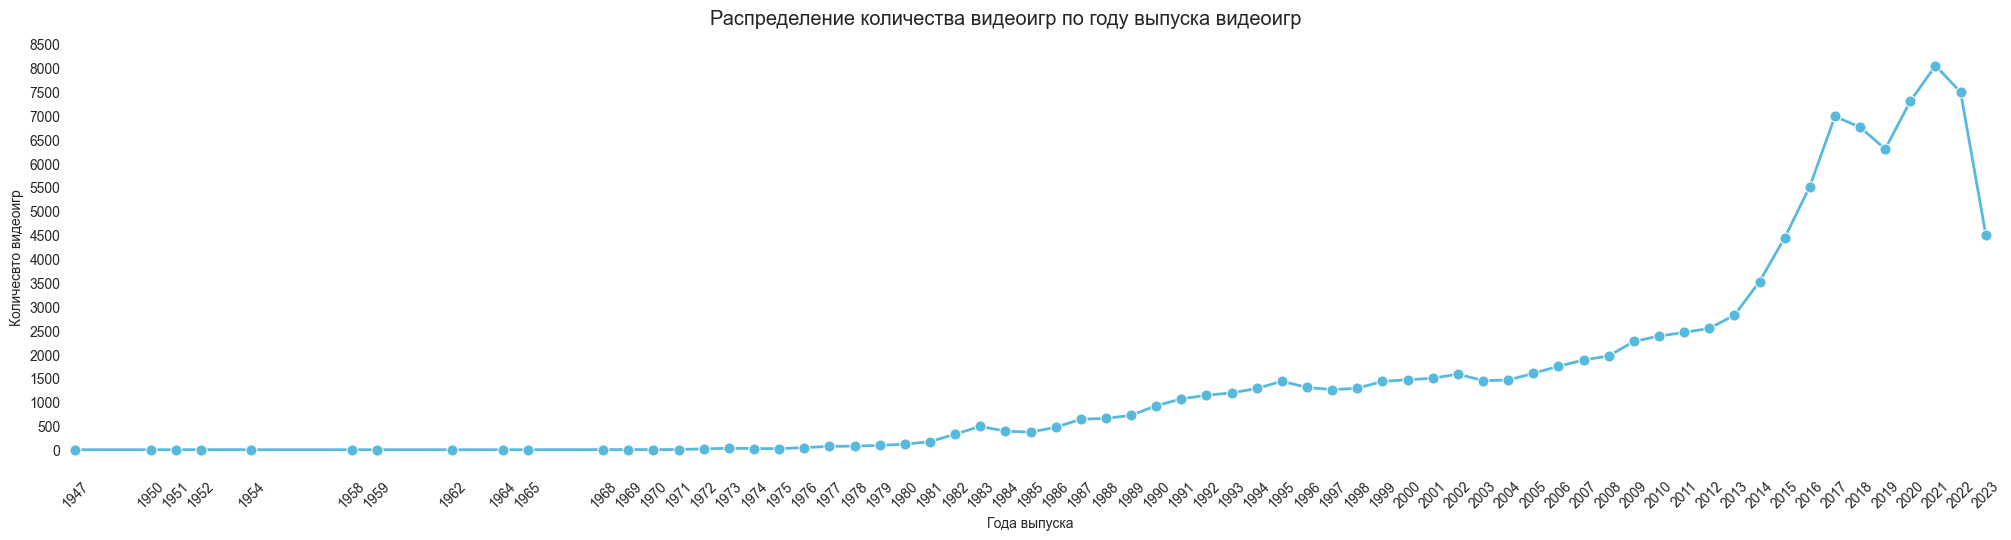

In [47]:
plot_data = (df['date']
             .dt
             .year
             .value_counts()
             .sort_index()
             .reset_index())

distribution(
    title=('Распределение количества видеоигр '
           'по году выпуска видеоигр'),
    ylabel='Количесвто видеоигр',
    data=plot_data,
    x='date',
    y='count'
)

Самая **первая видеоигра** была выпущена в **1947** году. **Резкий подъем** количества выпущенных видеоигр начинается в **2013** году и достигает свого **пика** в **2021** году (приблизительно **8000** видеоигр).

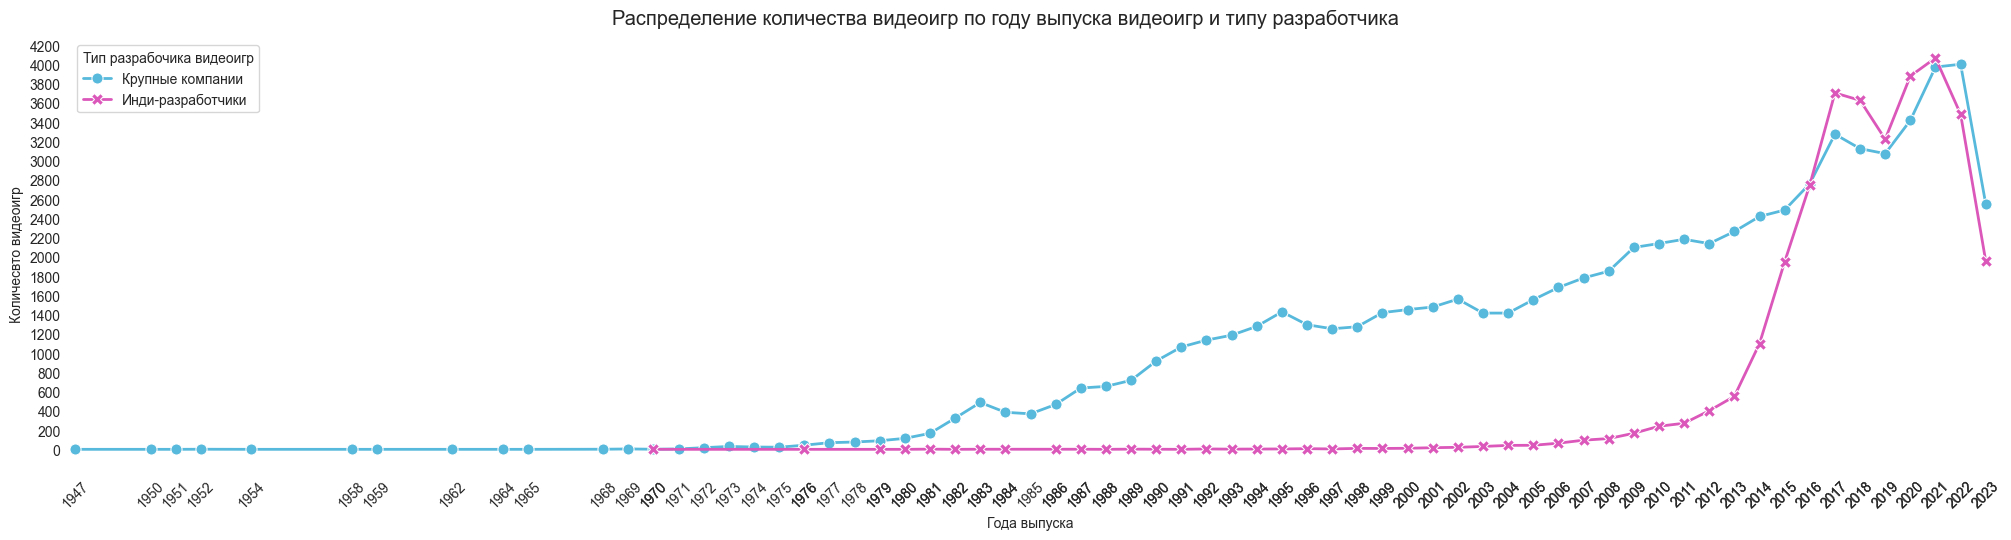

In [48]:
plot_data = (pd.DataFrame(
    data={
        'date': df['date'].dt.year,
        'indie': df['indie']
    }
)
             .groupby('date')
             .value_counts()
             .rename(index={True: 'Инди-разработчики', 
                            False: 'Крупные компании'}, level=1)
             .reset_index())

distribution(
    title=('Распределение количества видеоигр '
           'по году выпуска видеоигр и типу разработчика'),
    ylabel='Количесвто видеоигр',
    data=plot_data,
    x='date',
    y='count',
    hue='indie'
)

Если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то самая **первая видеоигра крупной компанией** была выпущена в **1947** году, а **инди-разаботчиком** в **1970**. **Резкого подъема** количества выпущенных видеоигр **крупными компаниями** не наблюдается, а выпуск видеоигр **инди-разработчиками** начал активноый рост в **2013** году. Наибольшее количество видеоигр было выпущено **крупными компаниями** в **2022** году (приблизительно **4000** видеоигр), **инди-разработчиками** в **2021** (приблизительно **4000** видеоигр). С **2016** по **2021** год количество выпущенных видеоигр **инди-разработчиками** превышало количество выпущенных видеоигр **крупными компаниями**.

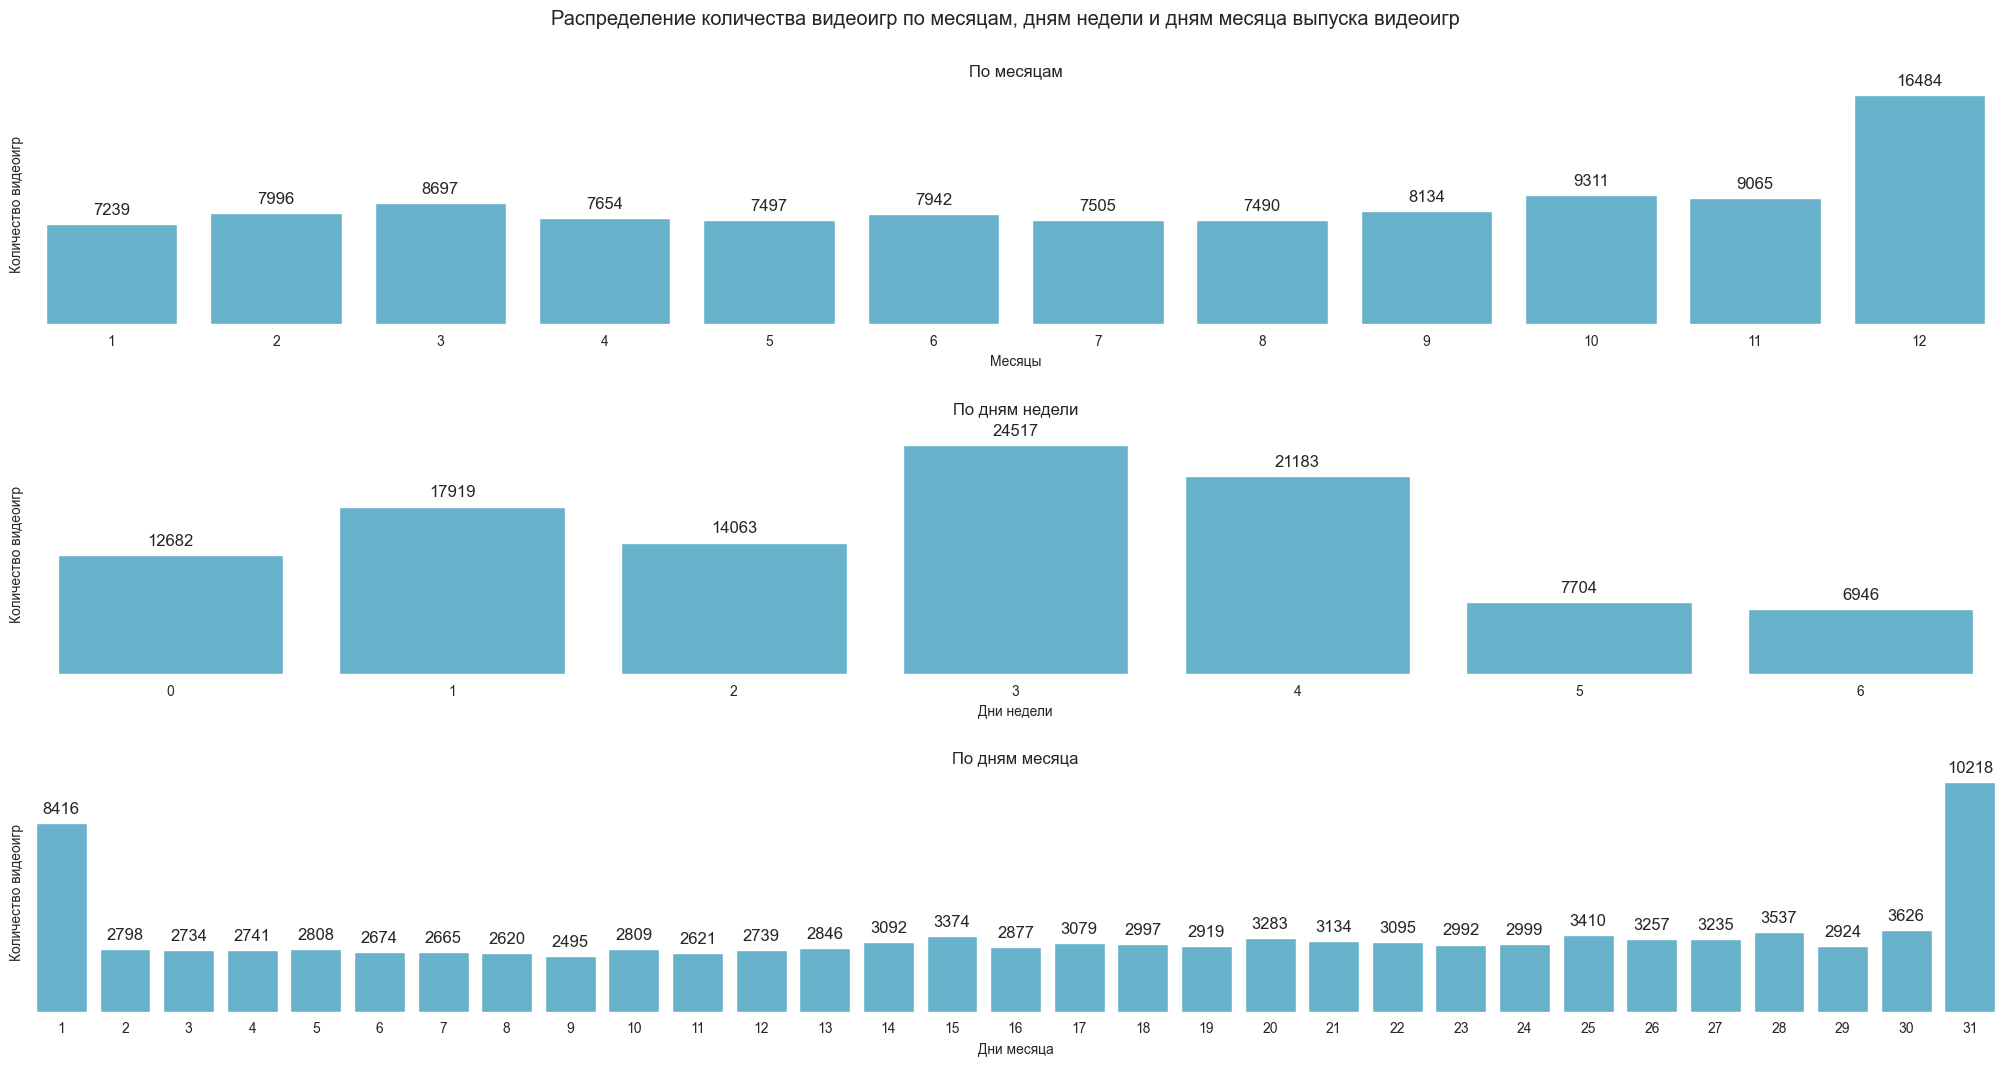

In [49]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 10)
)

figure.suptitle(
    t=('Распределение количества видеоигр '
       'по месяцам, дням недели и дням месяца выпуска видеоигр'), 
    y=1.05, 
    fontsize='x-large'
)

grid = GridSpec(
    figure=figure,
    nrows=3, 
    ncols=1, 
    hspace=0.1
)

figure.add_subplot(grid[0, 0])
figure.add_subplot(grid[1, 0])
figure.add_subplot(grid[2, 0])

plot_data = (df['date']
             .dt.month
             .astype('int')
             .value_counts()
             .sort_index()
             .reset_index())

sns.barplot(
    data=plot_data,
    x='date', 
    y='count', 
    ax=figure.axes[0],
    color=sns.color_palette('hls', 15)[8]
)

figure.axes[0].set_title(
    label='По месяцам',
    y=1,
    fontsize='large'
)
figure.axes[0].set_xlabel('Месяцы')
figure.axes[0].set_ylabel('Количество видеоигр')
figure.axes[0].set_yticks([])
figure.axes[0].bar_label(
    container=figure.axes[0].containers[0], 
    fontsize=12, 
    padding=5
)

plot_data = (df['date']
             .dt.weekday
             .astype('int')
             .value_counts()
             .sort_index()
             .reset_index())

sns.barplot(
    data=plot_data,
    x='date', 
    y='count',
    ax=figure.axes[1],
    color=sns.color_palette('hls', 15)[8]
)

figure.axes[1].set_title(
    label='По дням недели',
    y=1.05,
    fontsize='large'
)
figure.axes[1].set_xlabel('Дни недели')
figure.axes[1].set_ylabel('Количество видеоигр')
figure.axes[1].set_yticks([])
figure.axes[1].bar_label(
    container=figure.axes[1].containers[0], 
    fontsize=12, 
    padding=5
)

plot_data = (df['date']
             .dt.day
             .astype('int')
             .value_counts()
             .sort_index()
             .reset_index())

sns.barplot(
    data=plot_data,
    x='date', 
    y='count',
    ax=figure.axes[2], 
    color=sns.color_palette('hls', 15)[8]
)

figure.axes[2].set_title(
    label='По дням месяца',
    y=1,
    fontsize='large'
)
figure.axes[2].set_xlabel('Дни месяца')
figure.axes[2].set_ylabel('Количество видеоигр')
figure.axes[2].set_yticks([])
figure.axes[2].bar_label(
    container=figure.axes[2].containers[0], 
    fontsize=12, 
    padding=5
)

for ax in range(3):
    for s in 'top', 'right', 'bottom', 'left':
        figure.axes[ax].spines[s].set_visible(False)

Наибольшее количество видеоигр было выпущено в **декабре**, **1** и **31** числа.

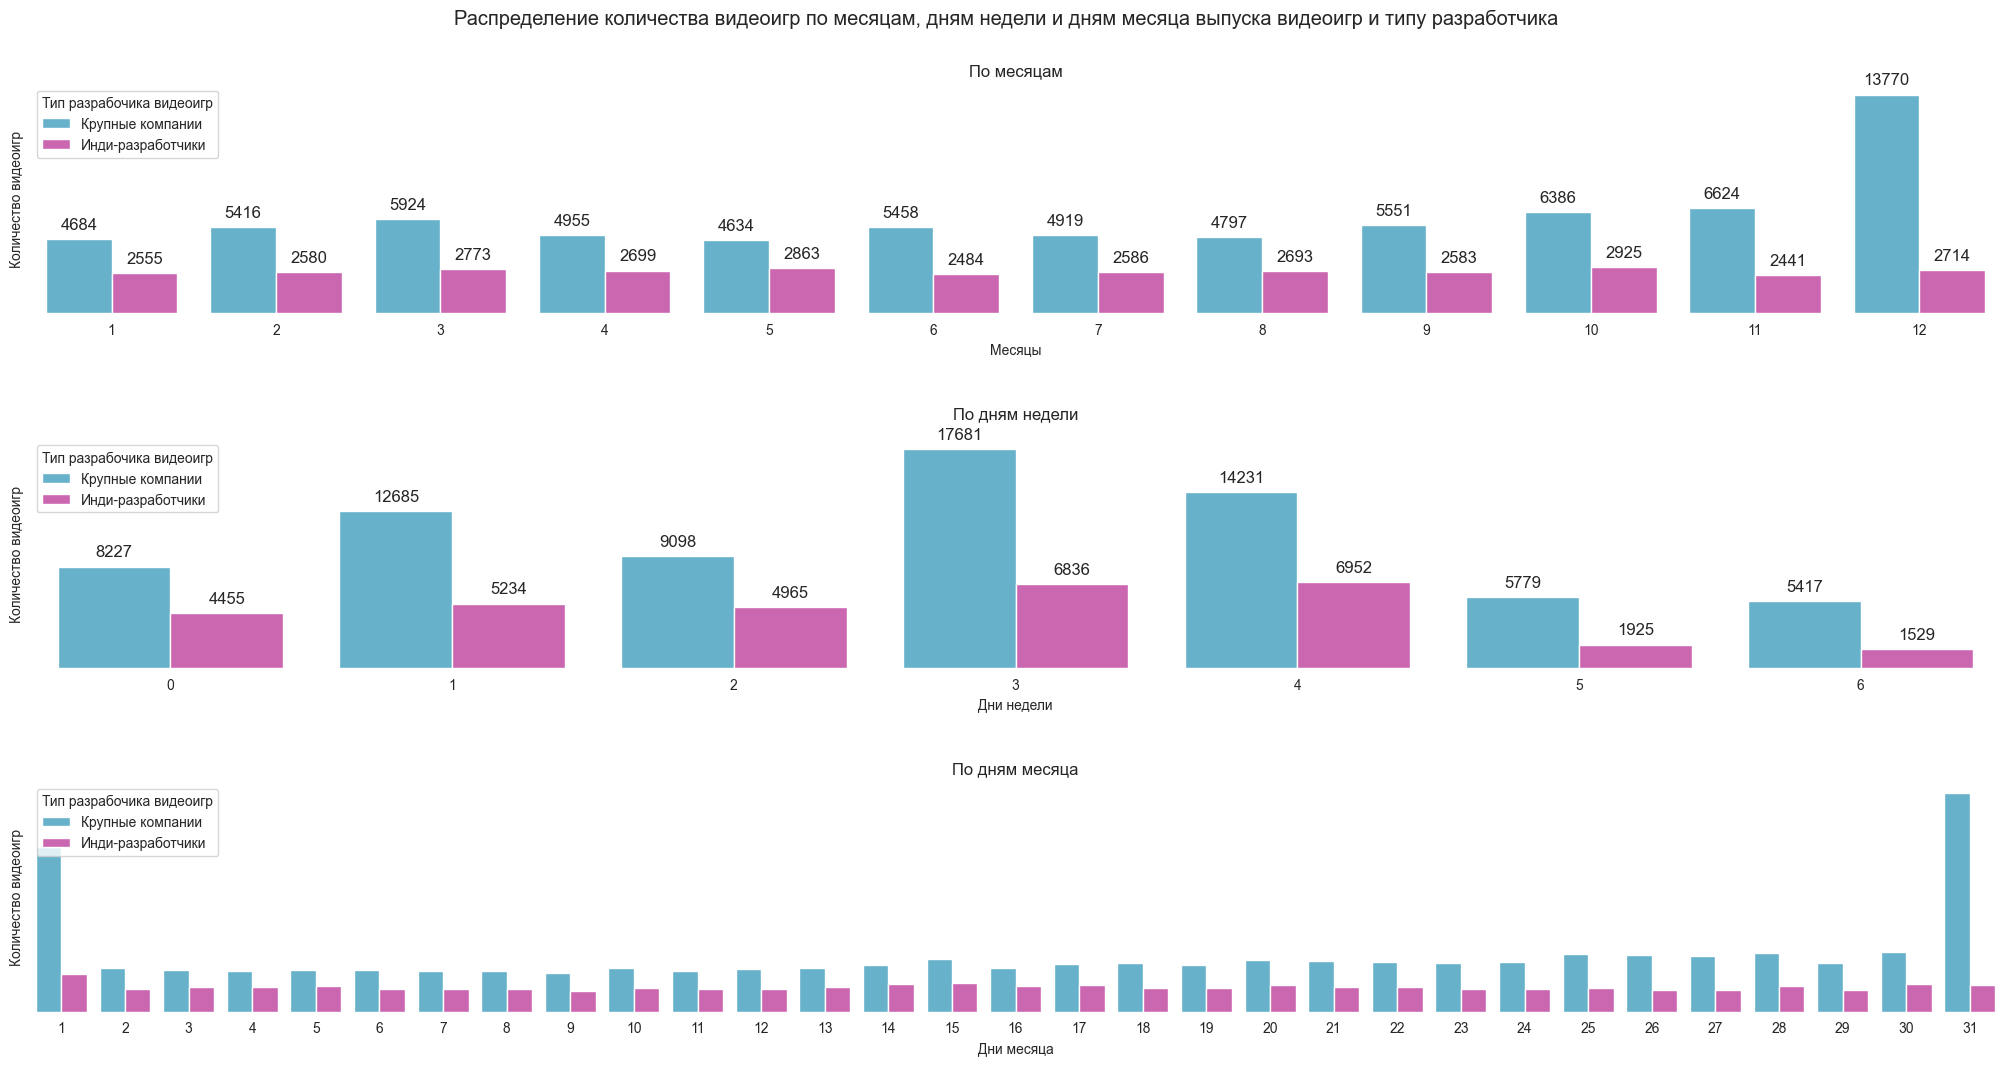

In [50]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 10)
)

figure.suptitle(
    t=('Распределение количества видеоигр '
       'по месяцам, дням недели и дням месяца выпуска видеоигр '
       'и типу разработчика'), 
    y=1.05, 
    fontsize='x-large'
)

grid = GridSpec(
    figure=figure,
    nrows=3, 
    ncols=1, 
    hspace=0.15
)

figure.add_subplot(grid[0, 0])
figure.add_subplot(grid[1, 0])
figure.add_subplot(grid[2, 0])

plot_data = (pd.DataFrame(
    data={
        'month': df['date'].dt.month,
        'indie': df['indie'],
        'count': df['name']}
    )
             .groupby(['month', 'indie'])
             .count()
             .rename(index={True: 'Инди-разработчики', 
                            False: 'Крупные компании'}, level=1)
             .reset_index())

sns.barplot(
    data=plot_data,
    x='month', 
    y='count',
    hue='indie',
    hue_order=['Крупные компании', 'Инди-разработчики'],
    ax=figure.axes[0], 
    palette=sns.color_palette('hls', 15)[8::5],
)

figure.axes[0].set_title(
    label='По месяцам',
    y=1,
    fontsize='large'
)
figure.axes[0].set_xlabel('Месяцы')
figure.axes[0].set_ylabel('Количество видеоигр')
figure.axes[0].set_yticks([])
figure.axes[0].bar_label(
    container=figure.axes[0].containers[0], 
    fontsize=12, 
    padding=5
)
figure.axes[0].bar_label(
    container=figure.axes[0].containers[1], 
    fontsize=12, 
    padding=5
)
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[0].spines[s].set_visible(False)
figure.axes[0].legend(
    title='Тип разрабочика видеоигр', 
    loc='upper left', 
    alignment='left'
)

plot_data = (pd.DataFrame(
    data={
        'weekday': df['date'].dt.weekday,
        'indie': df['indie'],
        'count': df['name']}
    )
             .groupby(['weekday', 'indie'])
             .count()
             .rename(index={True: 'Инди-разработчики', 
                            False: 'Крупные компании'}, level=1)
             .reset_index())

sns.barplot(
    data=plot_data,
    x='weekday', 
    y='count',
    hue='indie',
    hue_order=['Крупные компании', 'Инди-разработчики'],
    ax=figure.axes[1], 
    palette=sns.color_palette('hls', 15)[8::5],
)

figure.axes[1].set_title(
    label='По дням недели',
    y=1.05,
    fontsize='large'
)
figure.axes[1].set_xlabel('Дни недели')
figure.axes[1].set_ylabel('Количество видеоигр')
figure.axes[1].set_yticks([])
figure.axes[1].bar_label(
    container=figure.axes[1].containers[0], 
    fontsize=12, 
    padding=5
)
figure.axes[1].bar_label(
    container=figure.axes[1].containers[1], 
    fontsize=12, 
    padding=5
)
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[1].spines[s].set_visible(False)
figure.axes[1].legend(
    title='Тип разрабочика видеоигр', 
    loc='upper left', 
    alignment='left'
)

plot_data = (pd.DataFrame(
    data={
        'day': df['date'].dt.day,
        'indie': df['indie'],
        'count': df['name']}
    )
             .groupby(['day', 'indie'])
             .count()
             .rename(index={True: 'Инди-разработчики', 
                            False: 'Крупные компании'}, level=1)
             .reset_index())

sns.barplot(
    data=plot_data,
    x='day', 
    y='count',
    hue='indie',
    hue_order=['Крупные компании', 'Инди-разработчики'],
    ax=figure.axes[2], 
    palette=sns.color_palette('hls', 15)[8::5],
)

figure.axes[2].set_title(
    label='По дням месяца',
    y=1,
    fontsize='large'
)
figure.axes[2].set_xlabel('Дни месяца')
figure.axes[2].set_ylabel('Количество видеоигр')
figure.axes[2].set_yticks([])
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[2].spines[s].set_visible(False)
figure.axes[2].legend(
    title='Тип разрабочика видеоигр', 
    loc='upper left', 
    alignment='left'
);

Если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то для **крупных компаний** закономерность остается прежней, наибольшее количество видеоигр было выпущено в **декабре**, **1** и **31** числа. Для **инди-разрабочиков** количество выпущенных видеоигр **распределено равномерно** между месяцами и дням месяца. Вероятнее всего, в **крупных компаниях** дата выпуска видеоигр **планируется заранее**.

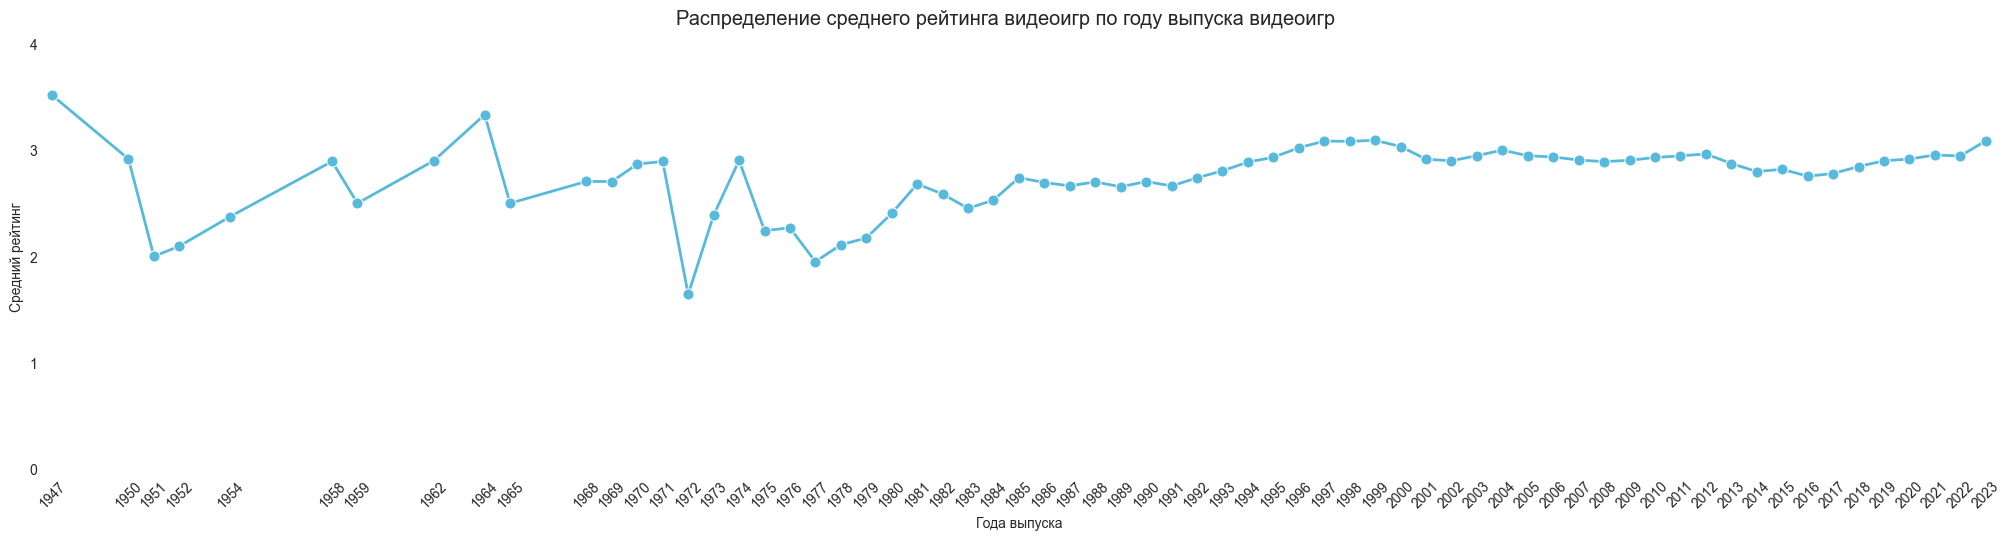

In [51]:
plot_data = (pd.DataFrame(
    data={
        'date': df['date'].dt.year,
        'rating': df['rating']
    }
)
             .groupby('date')
             .mean()['rating']
             .reset_index())

distribution(
    title=('Распределение среднего рейтинга видеоигр '
           'по году выпуска видеоигр'),
    ylabel='Средний рейтинг',
    data=plot_data,
    x='date',
    y='rating',
)

**Средний ретинг** видеоигр распределен по годам выпуска видеоигр **равномерно** и равен приблизительно **3.0**,  за исключением периода с **1947** по **1985**, когда видеоигры выпускались в не таком большом количестве.

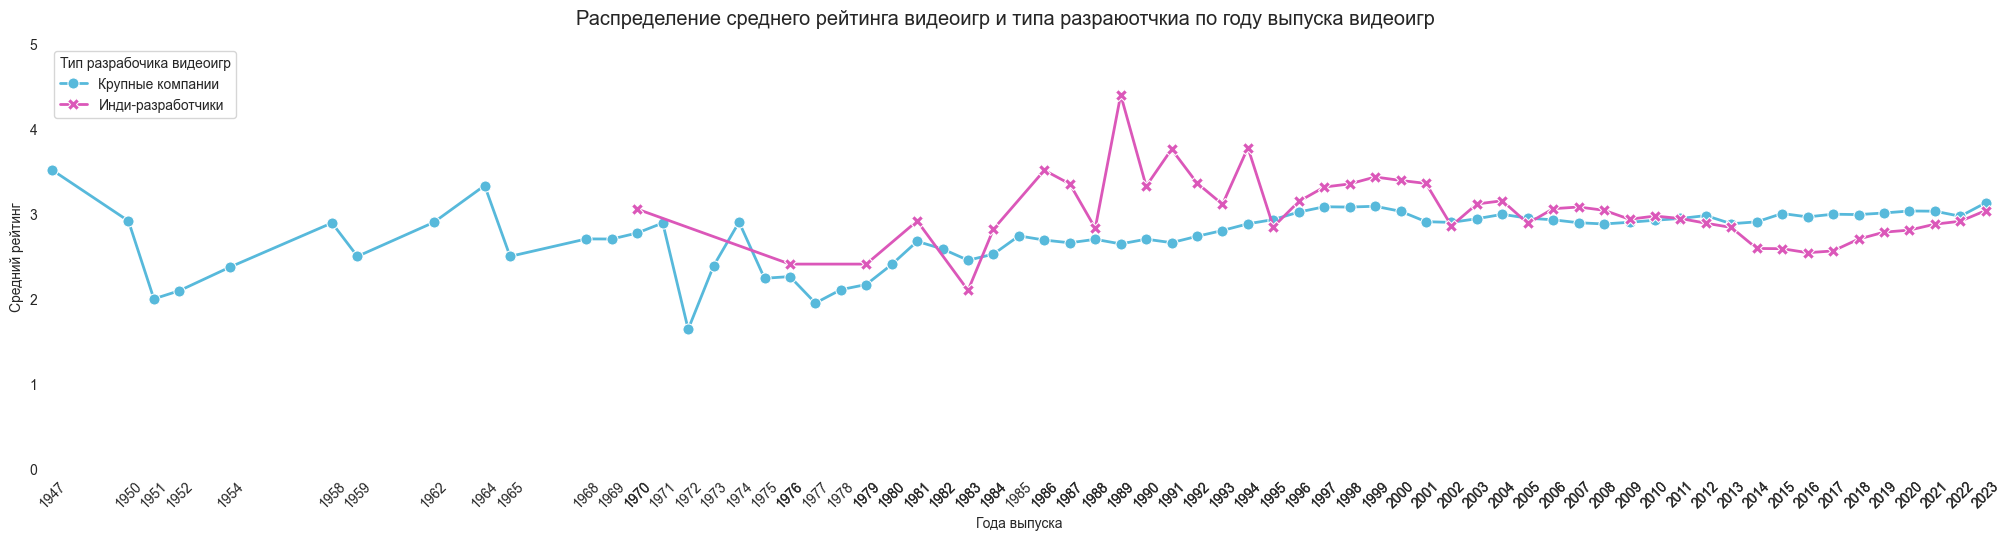

In [52]:
plot_data = ((pd.DataFrame(
    data={
        'date': df['date'].dt.year,
        'indie': df['indie'],
        'rating': df['rating']
    }
)
             .groupby(['date', 'indie'])
             .mean()
             .rename(index={True: 'Инди-разработчики', 
                            False: 'Крупные компании'}, level=1)
             .reset_index()))

distribution(
    title=('Распределение среднего рейтинга видеоигр '
           'и типа разраюотчкиа по году выпуска видеоигр'),
    ylabel='Средний рейтинг',
    data=plot_data,
    x='date',
    y='rating',
    hue='indie'
)

Если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то закономерность остается прежней, за исключением того, что в разные временные периоды, средний рейтинг видеоигр был больше у **крупных компаний** или **инди-разработчиков**.

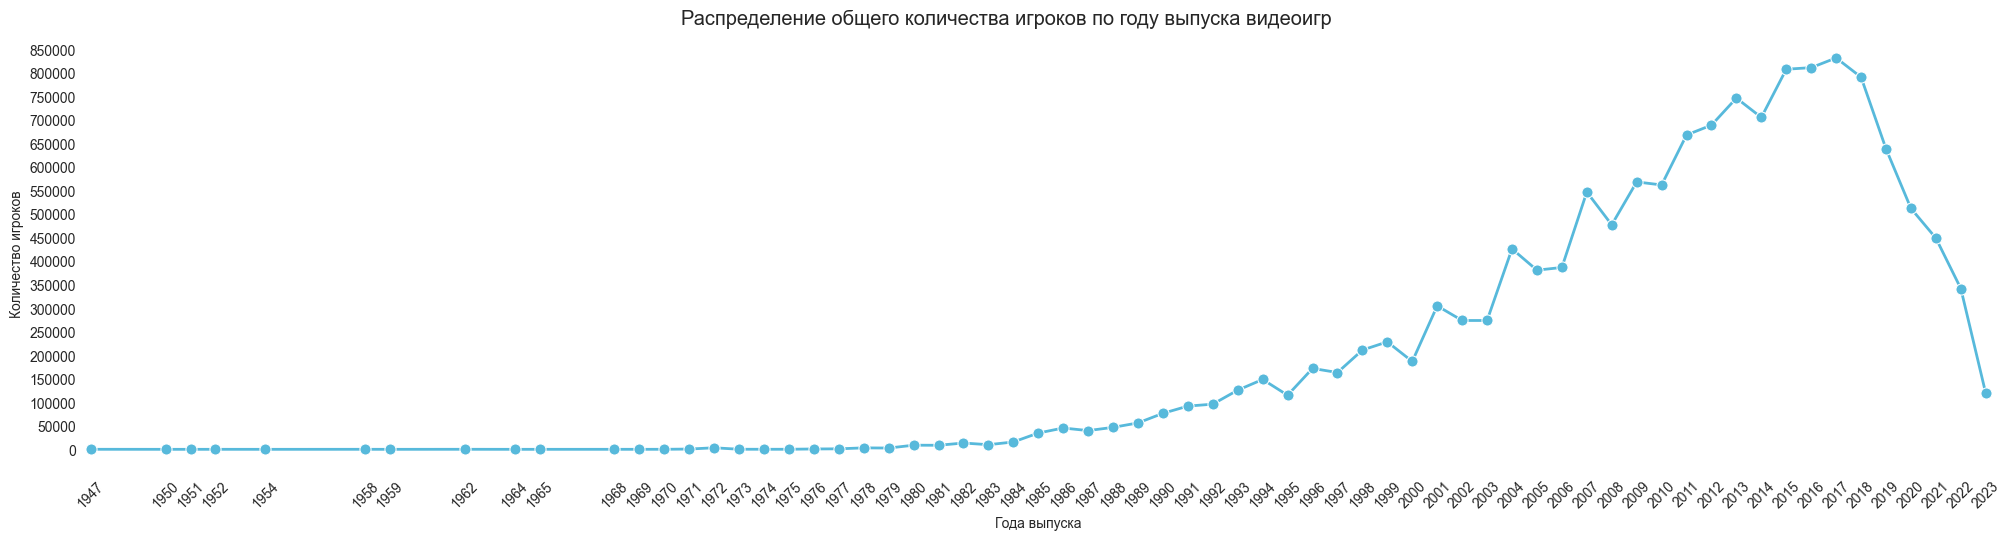

In [53]:
plot_data = (pd.DataFrame(
    data={
        'date': df['date'].dt.year,
        'plays': df['plays']
    }
)
             .groupby('date')
             .sum()['plays']
             .reset_index())

distribution(
    title=('Распределение общего количества игроков '
           'по году выпуска видеоигр'),
    ylabel='Количество игроков',
    data=plot_data,
    x='date',
    y='plays',
)

**Общее количество игроков**, игравших в видеоигры, **увеличивалось** вместе с годом выхода видеоигр и достигло **пика** в **2017** году (приблизительно **800 тыс.** игроков), после чего, стало **снижаться** (в игры, вышедшие в **2022** году играло приблизительно **400 тыс.** игроков).

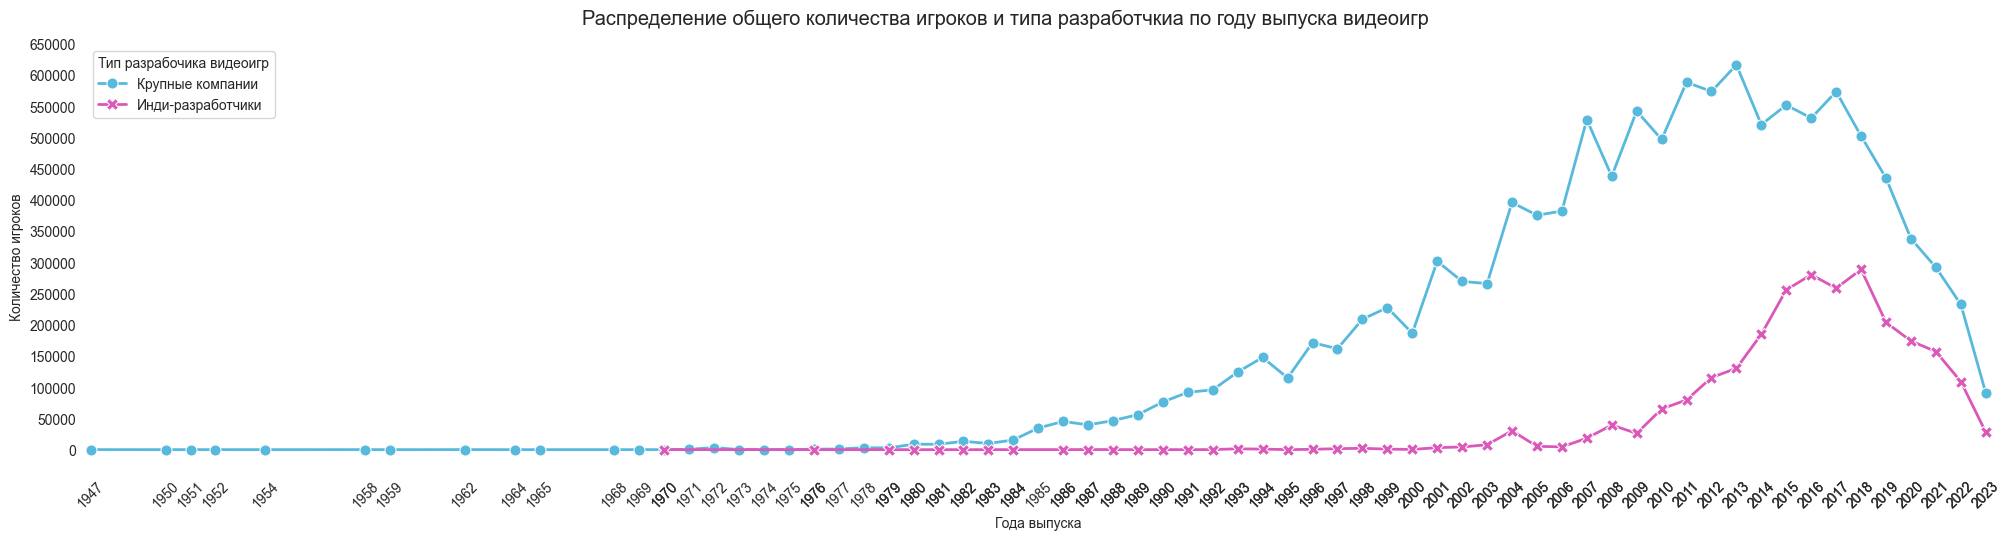

In [54]:
plot_data = ((pd.DataFrame(
    data={
        'date': df['date'].dt.year,
        'indie': df['indie'],
        'plays': df['plays']
    }
)
             .groupby(['date', 'indie'])
             .sum()
             .rename(index={True: 'Инди-разработчики', 
                            False: 'Крупные компании'}, level=1)
             .reset_index()))

distribution(
    title=('Распределение общего количества игроков '
           'и типа разработчкиа по году выпуска видеоигр'),
    ylabel='Количество игроков',
    data=plot_data,
    x='date',
    y='plays',
    hue='indie'
)

Если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то акивный рост общего количества игроков видеоигр, выпущенных **крупными компаниями** начался в **1985** году, а выпущенных **инди-разработчиками** в **2009**.

## Анализ числовых данных

Получим расширенную описательную статистику.

In [55]:
(df.select_dtypes(['float32', 'int32'])
 .describe(percentiles=np.linspace(0.1, 0.9, 9))
 .style
 .format(lambda x: f'{x:.2f}'))

Удалим отрицательные значения в полях **plays**, **playing**, **backlogs** и **wishlists**.

In [56]:
columns = ['plays', 'playing', 'backlogs', 'wishlists']

In [57]:
df = df[(df[columns] >= 0).all(axis=1)]

In [58]:
(df.select_dtypes(['float32', 'int32'])
 .describe(percentiles=np.linspace(0.1, 0.9, 9))
 .style
 .format(lambda x: f'{x:.2f}'))

Более **90%** видеоигр имеют:
- **рейтинг** - менее  **4.0**;
- **количество отзывов** - менее **10**;
- **общее количество игроков**, менее **100**;
- **количество игроков**, играющих в видеоигру в настоящий момент менее **5**;
- количество игроков, добавивших видеоигру в **backlog** или **wishlists** - менее **50**.

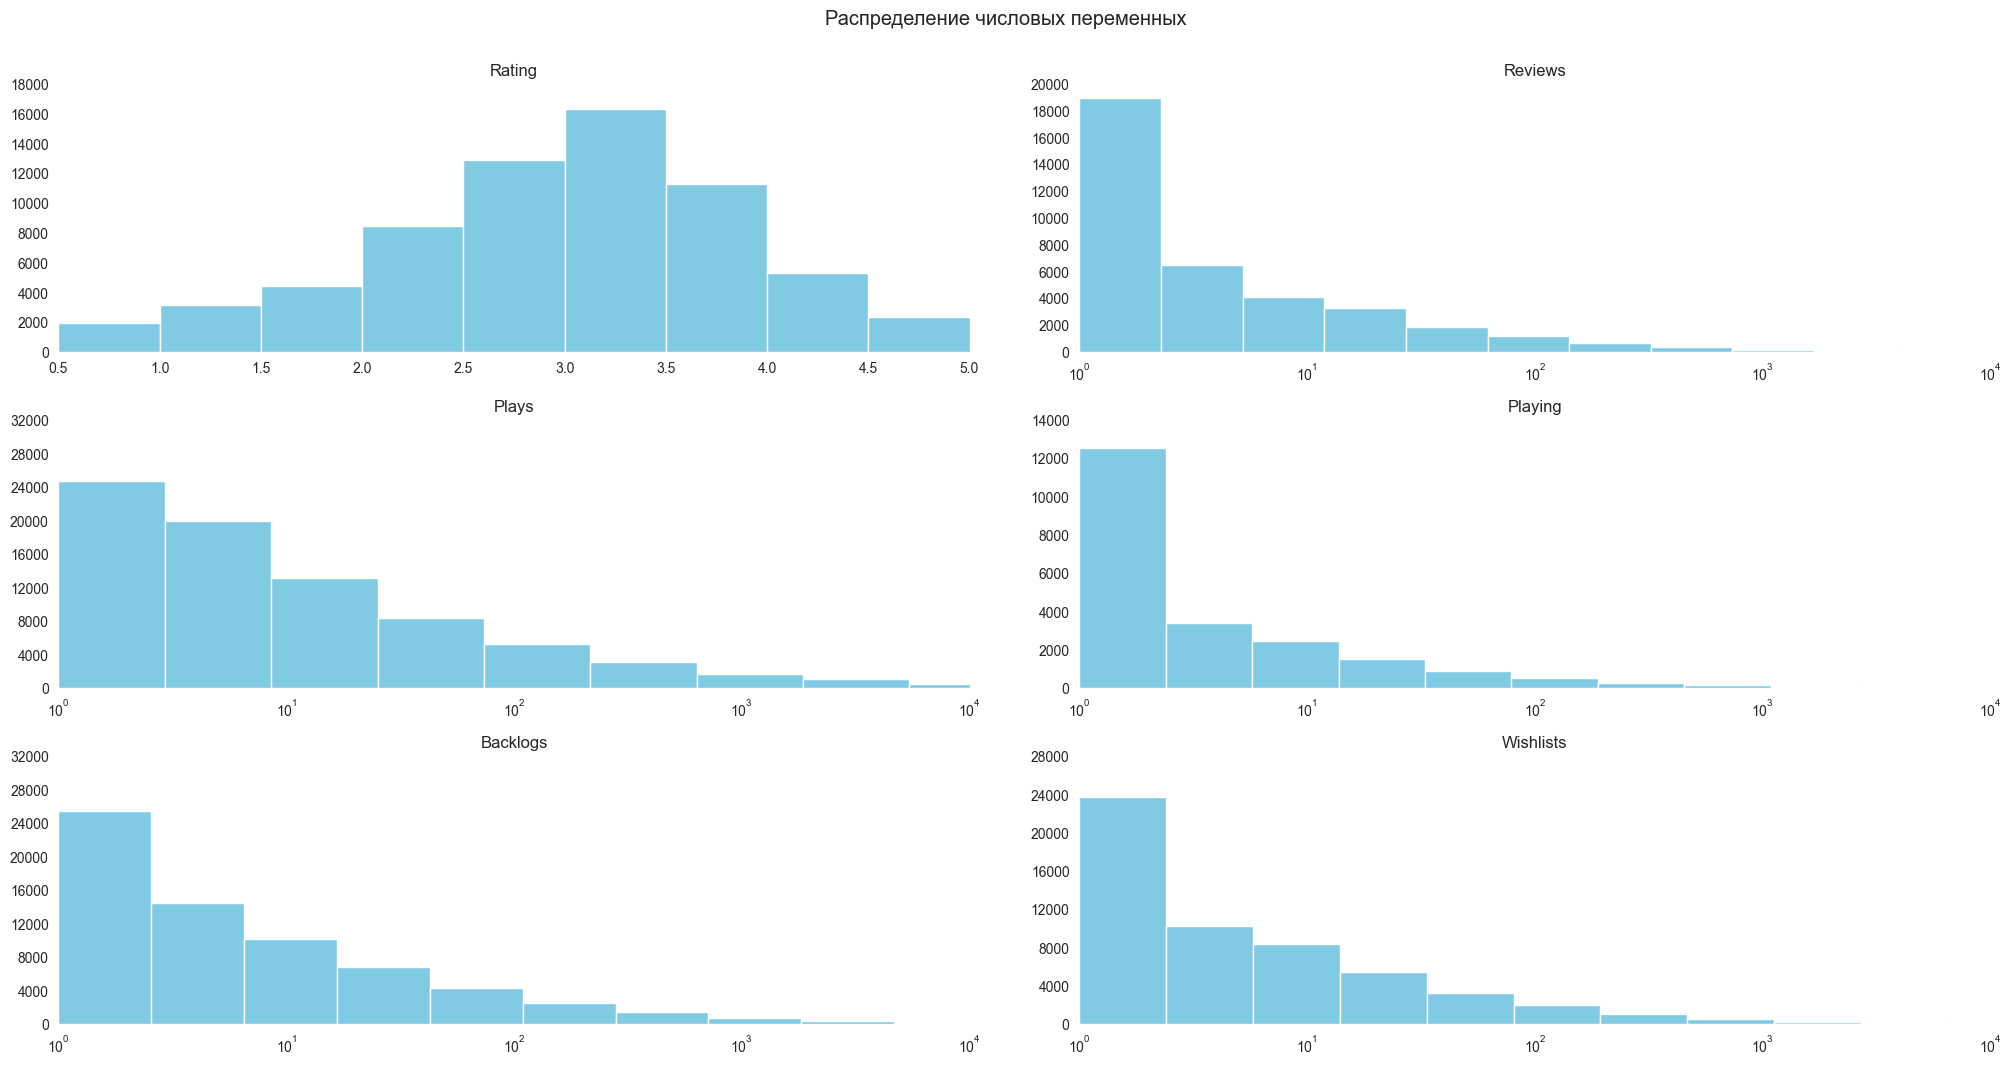

In [59]:
figure = plt.figure(
    layout="constrained", 
    figsize=(20, 10)
)

figure.suptitle(
    t='Распределение числовых переменных',
    y=1.05,
    fontsize='x-large'
)

grid = GridSpec(
    figure=figure, 
    nrows=3, 
    ncols=2,  
    hspace=0.05, 
    wspace=0.05
)

for i in range(3):
    for j in range(2):
        figure.add_subplot(grid[i, j])

columns = df.select_dtypes(['float32', 'int32']).columns

for i, column in enumerate(columns):
    bins = np.linspace(0., 5.0, 11) if not i else 10
    
    sns.histplot(
        x=df[column], 
        ax=figure.axes[i], 
        bins=bins,
        log_scale=True if i else False,
        color=sns.color_palette('hls', 15)[8]
    )
        
    figure.axes[i].set_title(
        label=column.capitalize(),
        y=1,
        fontsize='large'
    )
    figure.axes[i].set_xlabel('')
    figure.axes[i].set_ylabel('')
    s, maximum = step(figure.axes[i].get_yticks().max() - 1, 2)
    figure.axes[i].set_yticks(np.arange(0, maximum + 1, s))
    if i:
        figure.axes[i].set_xticks([10**x for x in range(5)])
        figure.axes[i].set_xbound(10**0, 10**4)
    else:
        figure.axes[0].set_xbound((0.5, 5.0))
    for s in 'top', 'right', 'bottom', 'left':
        figure.axes[i].spines[s].set_visible(False)

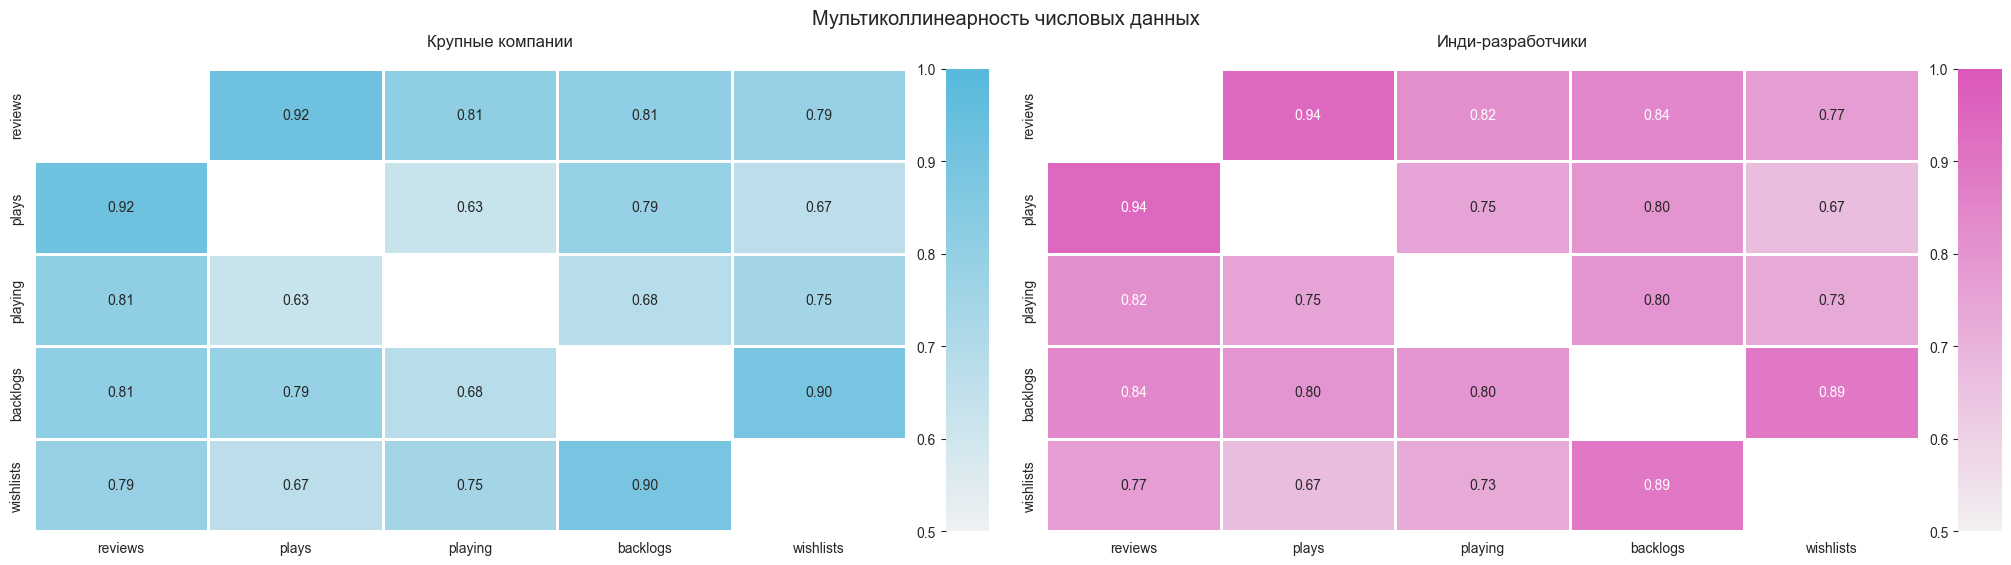

In [60]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 5)
)

figure.suptitle(
    t='Мультиколлинеарность числовых данных', 
    y=1.1, 
    fontsize='x-large'
)

subfigures: list[plt.Figure] = list(figure.subfigures(
    nrows=1,
    ncols=2,
    wspace=0.025
))

grid_1 = GridSpec(
    figure=subfigures[0],
    nrows=1,
    ncols=2,
    wspace=0.01,
    left=0,
    right=1,
    top=1,
    bottom=0,
    width_ratios=[1, 0.05]
)

grid_2 = GridSpec(
    figure=subfigures[1],
    nrows=1,
    ncols=2,
    wspace=0.01,
    left=0,
    right=1,
    top=1,
    bottom=0,
    width_ratios=[1, 0.05]
)

subfigures[0].add_subplot(grid_1[0, 0])
subfigures[0].add_subplot(grid_1[0, 1])
subfigures[1].add_subplot(grid_2[0, 0])
subfigures[1].add_subplot(grid_2[0, 1])

columns = ['reviews', 'plays', 'playing', 'backlogs', 'wishlists']

plot_data = (df
             .loc[~df['indie'].map(bool), columns]
             .corr())

subfigures[0].suptitle(
    t='Крупные компании',
    y=1.05,
    fontsize='large'
)   

sns.heatmap(
    data=plot_data,
    ax=subfigures[0].axes[0],
    annot=True,
    linewidths=1.0,
    fmt='.2f',
    mask = plot_data == 1,
    cmap=sns.color_palette("light:#57b9db", as_cmap=True),
    cbar_ax=subfigures[0].axes[1],
    cbar_kws={'ticklocation': 'left'},
    vmin=0.5,
    vmax=1.0
)

subfigures[0].axes[1].set_yticks(np.linspace(0.5, 1.0, 6))

plot_data = (df
             .loc[df['indie'].map(bool), columns]
             .corr())

subfigures[1].suptitle(
    t='Инди-разработчики',
    y=1.05,
    fontsize='large'
)

sns.heatmap(
    data=plot_data,
    ax=subfigures[1].axes[0],
    annot=True,
    linewidths=1.0,
    fmt='.2f',
    mask = plot_data == 1,
    cmap=sns.color_palette("light:#db57b9", as_cmap=True),
    cbar_ax=subfigures[1].axes[1],
    cbar_kws={'ticklocation': 'left'},
    vmin=0.5,
    vmax=1.0
)

subfigures[1].axes[1].set_yticks(np.linspace(0.5, 1.0, 6));

Наибольшей зависимостью обладают (коэфициент корреляции Пирсона - более 0.9) - **общее количество игроков** и **количество отзывов**, количество игроков, добавивших видеоигру в **backlog** и **wishlists**. **Остальные числовые данные** (за исключением рейтинга видеоигр) имеют коэфициент корреляции Пирсона не менее **0.6**.

### Анализ рейтинга видеоигр

Гистограмма показывает, что данные в полe **'rating'** подчиняются закону распределения, **близкому к нормальному**. Давайте подробнее рассмотрим, как распределяются данные в этом поле. Для этого построим несколько диаграмм.

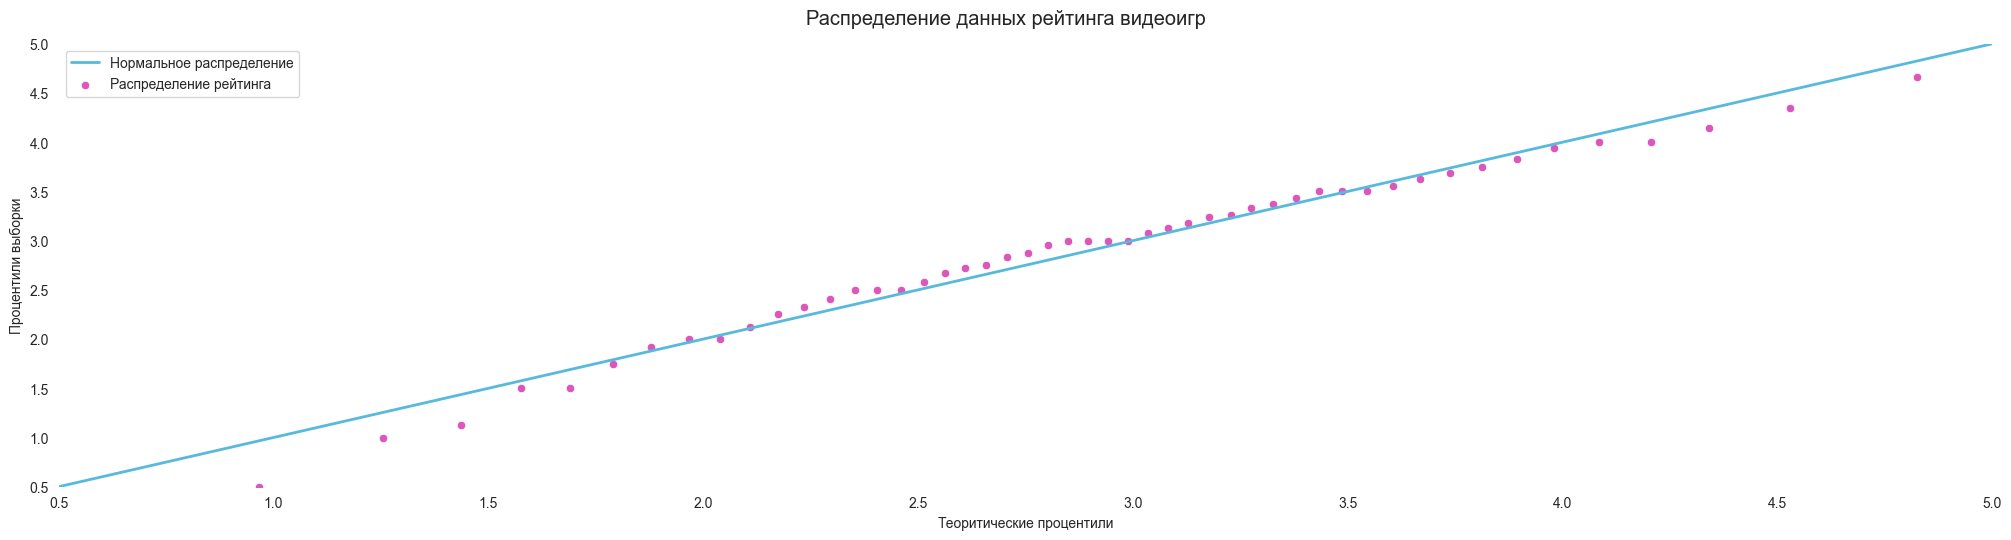

In [61]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 5)
)

figure.suptitle(
    t='Распределение данных рейтинга видеоигр', 
    y=1.05, 
    fontsize='x-large'
)

figure.add_subplot()

rating_distribution = df.loc[df['rating'].notna(), 'rating']
normal_distribution = np.random.normal(
    loc=rating_distribution.mean(), 
    scale=rating_distribution.std(), 
    size=rating_distribution.size
)

percentiles = np.linspace(0, 100, 51)
rating = np.percentile(rating_distribution, percentiles)
normal = np.percentile(normal_distribution, percentiles)

sns.lineplot(
    x=normal, 
    y=normal,
    linewidth=2.0,
    ax=figure.axes[0], 
    label='Нормальное распределение', 
    color=sns.color_palette('hls', 15)[8]
)

sns.scatterplot(
    x=normal,
    y=rating,
    sizes=8,
    ax=figure.axes[0], 
    label='Распределение рейтинга', 
    color=sns.color_palette('hls', 15)[13]
)

figure.axes[0].set_xlabel('Теоритические процентили')
figure.axes[0].set_ylabel('Процентили выборки')
figure.axes[0].set_xbound((0.5, 5.0))
figure.axes[0].set_ybound((0.5, 5.0))
figure.axes[0].set_xticks(np.linspace(0.5, 5.0, 10))
figure.axes[0].set_yticks(np.linspace(0.5, 5.0, 10))
for s in 'top', 'right', 'bottom', 'left':
        figure.axes[0].spines[s].set_visible(False)
figure.axes[0].legend(alignment='left');

**График Q-Q** (Квантиль-Квантильный график) позволяет оценить, насколько близко **распределение данных** к **нормальному распределению**. На этом графике видно, что распределение данных поля 'rating' **очень близко к нормальному**.

Посмотрим, как рейтинг коррелирует с другими числовыми переменными.

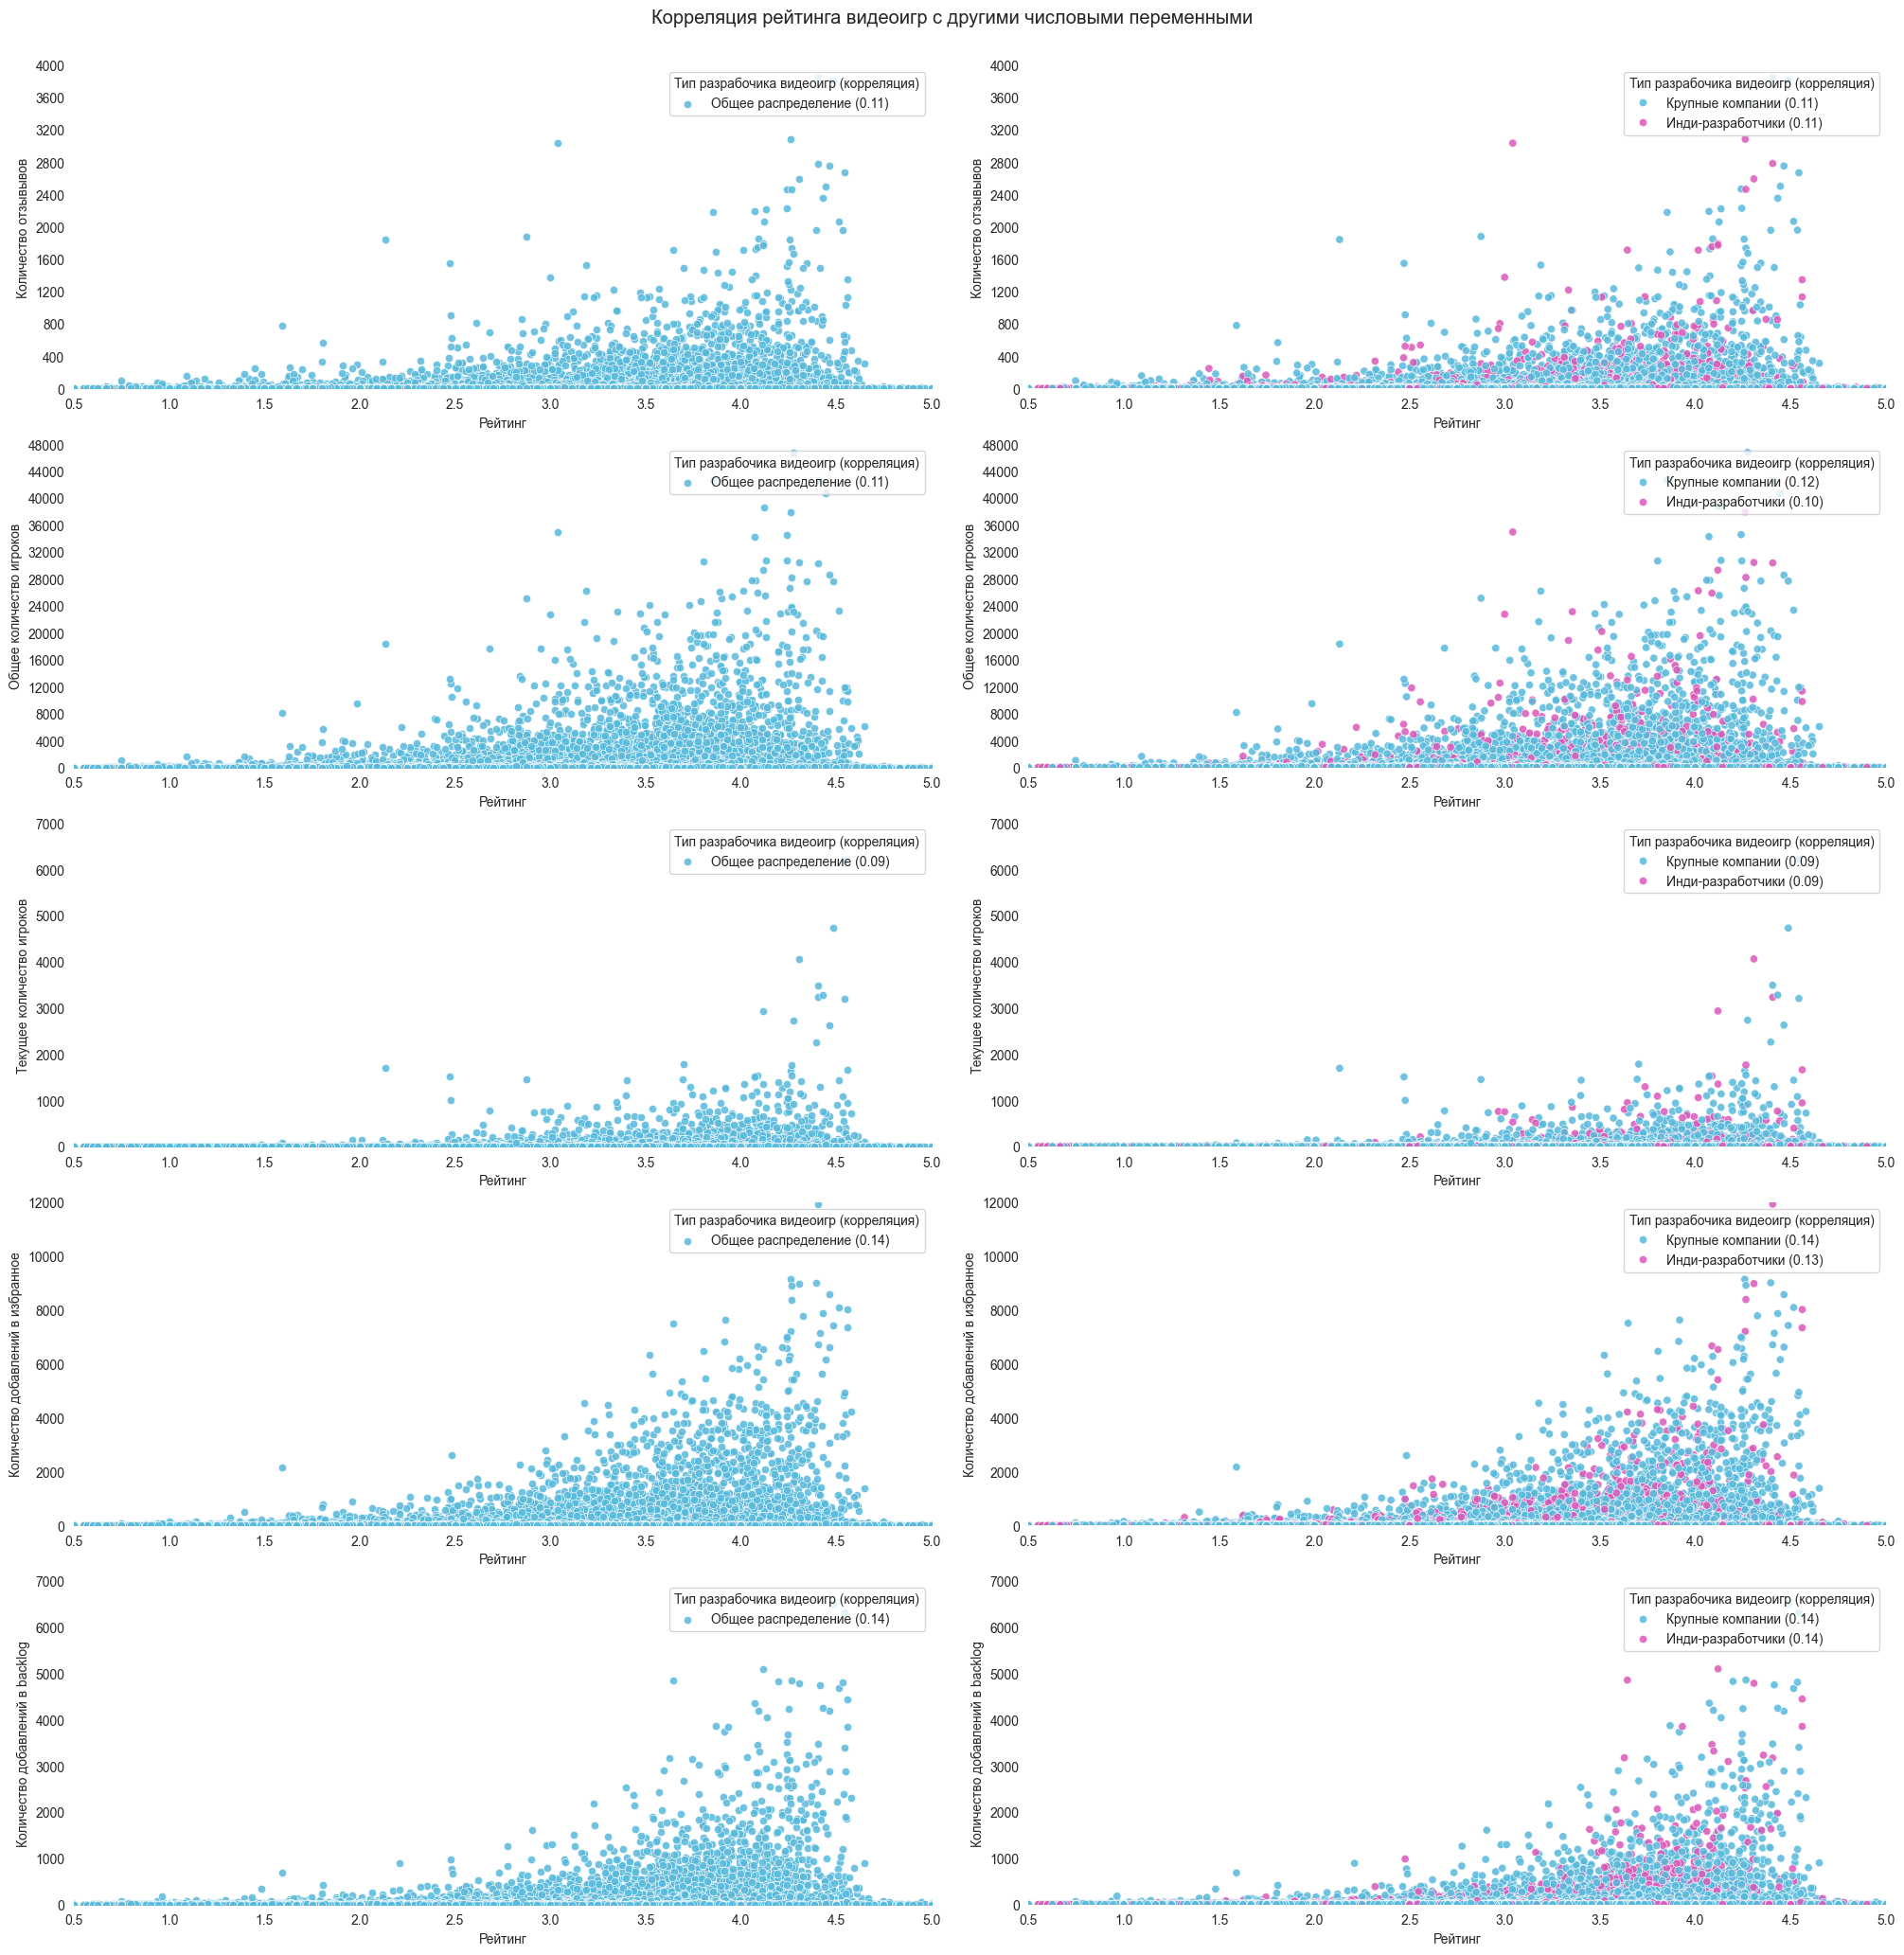

In [62]:
figure = plt.figure(
    layout="constrained", 
    figsize=(20, 20)
)

figure.suptitle(
    t='Корреляция рейтинга видеоигр с другими числовыми переменными',
    y=1.025,
    fontsize='x-large'
)

grid = GridSpec(
    figure=figure, 
    nrows=5, 
    ncols=2,  
    hspace=0.025, 
    wspace=0.025
)

for i in range(5):
    for j in range(2):
        figure.add_subplot(grid[i, j])

columns = df.select_dtypes(['int32']).columns

for i, column in zip(np.arange(0, 9, 2), columns):
    plot_data = df[['rating', column, 'indie']]

    sns.scatterplot(
        data=plot_data,
        x='rating',
        y=column,
        alpha=0.85,
        sizes=8,
        ax=figure.axes[i],
        color=sns.color_palette('hls', 15)[8]
    )

    sns.scatterplot(
        data=plot_data,
        x='rating',
        y=column,
        hue='indie',
        hue_order=[False, True],
        alpha=0.85,
        sizes=8,
        ax=figure.axes[i + 1],
        palette=sns.color_palette('hls', 15)[8::5]
    )

    for j in range(2):      
        figure.axes[i + j].set_xlabel('Рейтинг')
        figure.axes[i + j].set_ylabel(
            {
                0: 'Количество отзывывов',
                2: 'Общее количество игроков',
                4: 'Текущее количество игроков',
                6: 'Количество добавлений в избранное',
                8: 'Количество добавлений в backlog',
            }[i])
        figure.axes[i + j].set_xticks(np.linspace(0.5, 5.0, 10))
        s, maximum = step(plot_data[column].max(), 2)
        figure.axes[i + j].set_yticks(np.arange(0, maximum + 1, s))
        figure.axes[i + j].set_xbound((0.5, 5.0))
        figure.axes[i + j].set_ybound((0.0, maximum))
        for s in 'top', 'right', 'bottom', 'left':
            figure.axes[i + j].spines[s].set_visible(False)
        if not j:
            pirson = plot_data['rating'].corr(plot_data[column])
            figure.axes[i + j].legend(
                title='Тип разрабочика видеоигр (корреляция)',
                labels=[f'Общее распределение ({pirson:.2f})'],
                loc='upper right', 
                alignment='left'
            )
        else:
            pirson = (plot_data
                      .loc[~plot_data['indie'], 'rating']
                      .corr(plot_data.loc[~plot_data['indie'], column]),
                      plot_data
                      .loc[plot_data['indie'], 'rating']
                      .corr(plot_data.loc[plot_data['indie'], column]))
            figure.axes[i + j].legend(
                title='Тип разрабочика видеоигр (корреляция)',
                handles=figure.axes[i + j].get_legend().legend_handles,
                labels=[f'Крупные компании ({pirson[0]:.2f})', 
                        f'Инди-разработчики ({pirson[1]:.2f})'],
                loc='upper right', 
                alignment='left'
            )
            

Зависимость рейтинга видеоигр от других числовых переменных незначительна (коэффициент корреляции Пиросна менее 0.15). Если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то зависимость рейтинга видеоигр от других числовых переменных **не изменится**.

Посмотрим, как распределен рейтинг видеоигр по топ-10 игровым платформам по количеству выпущенных видеоигр и по типу разработчика.

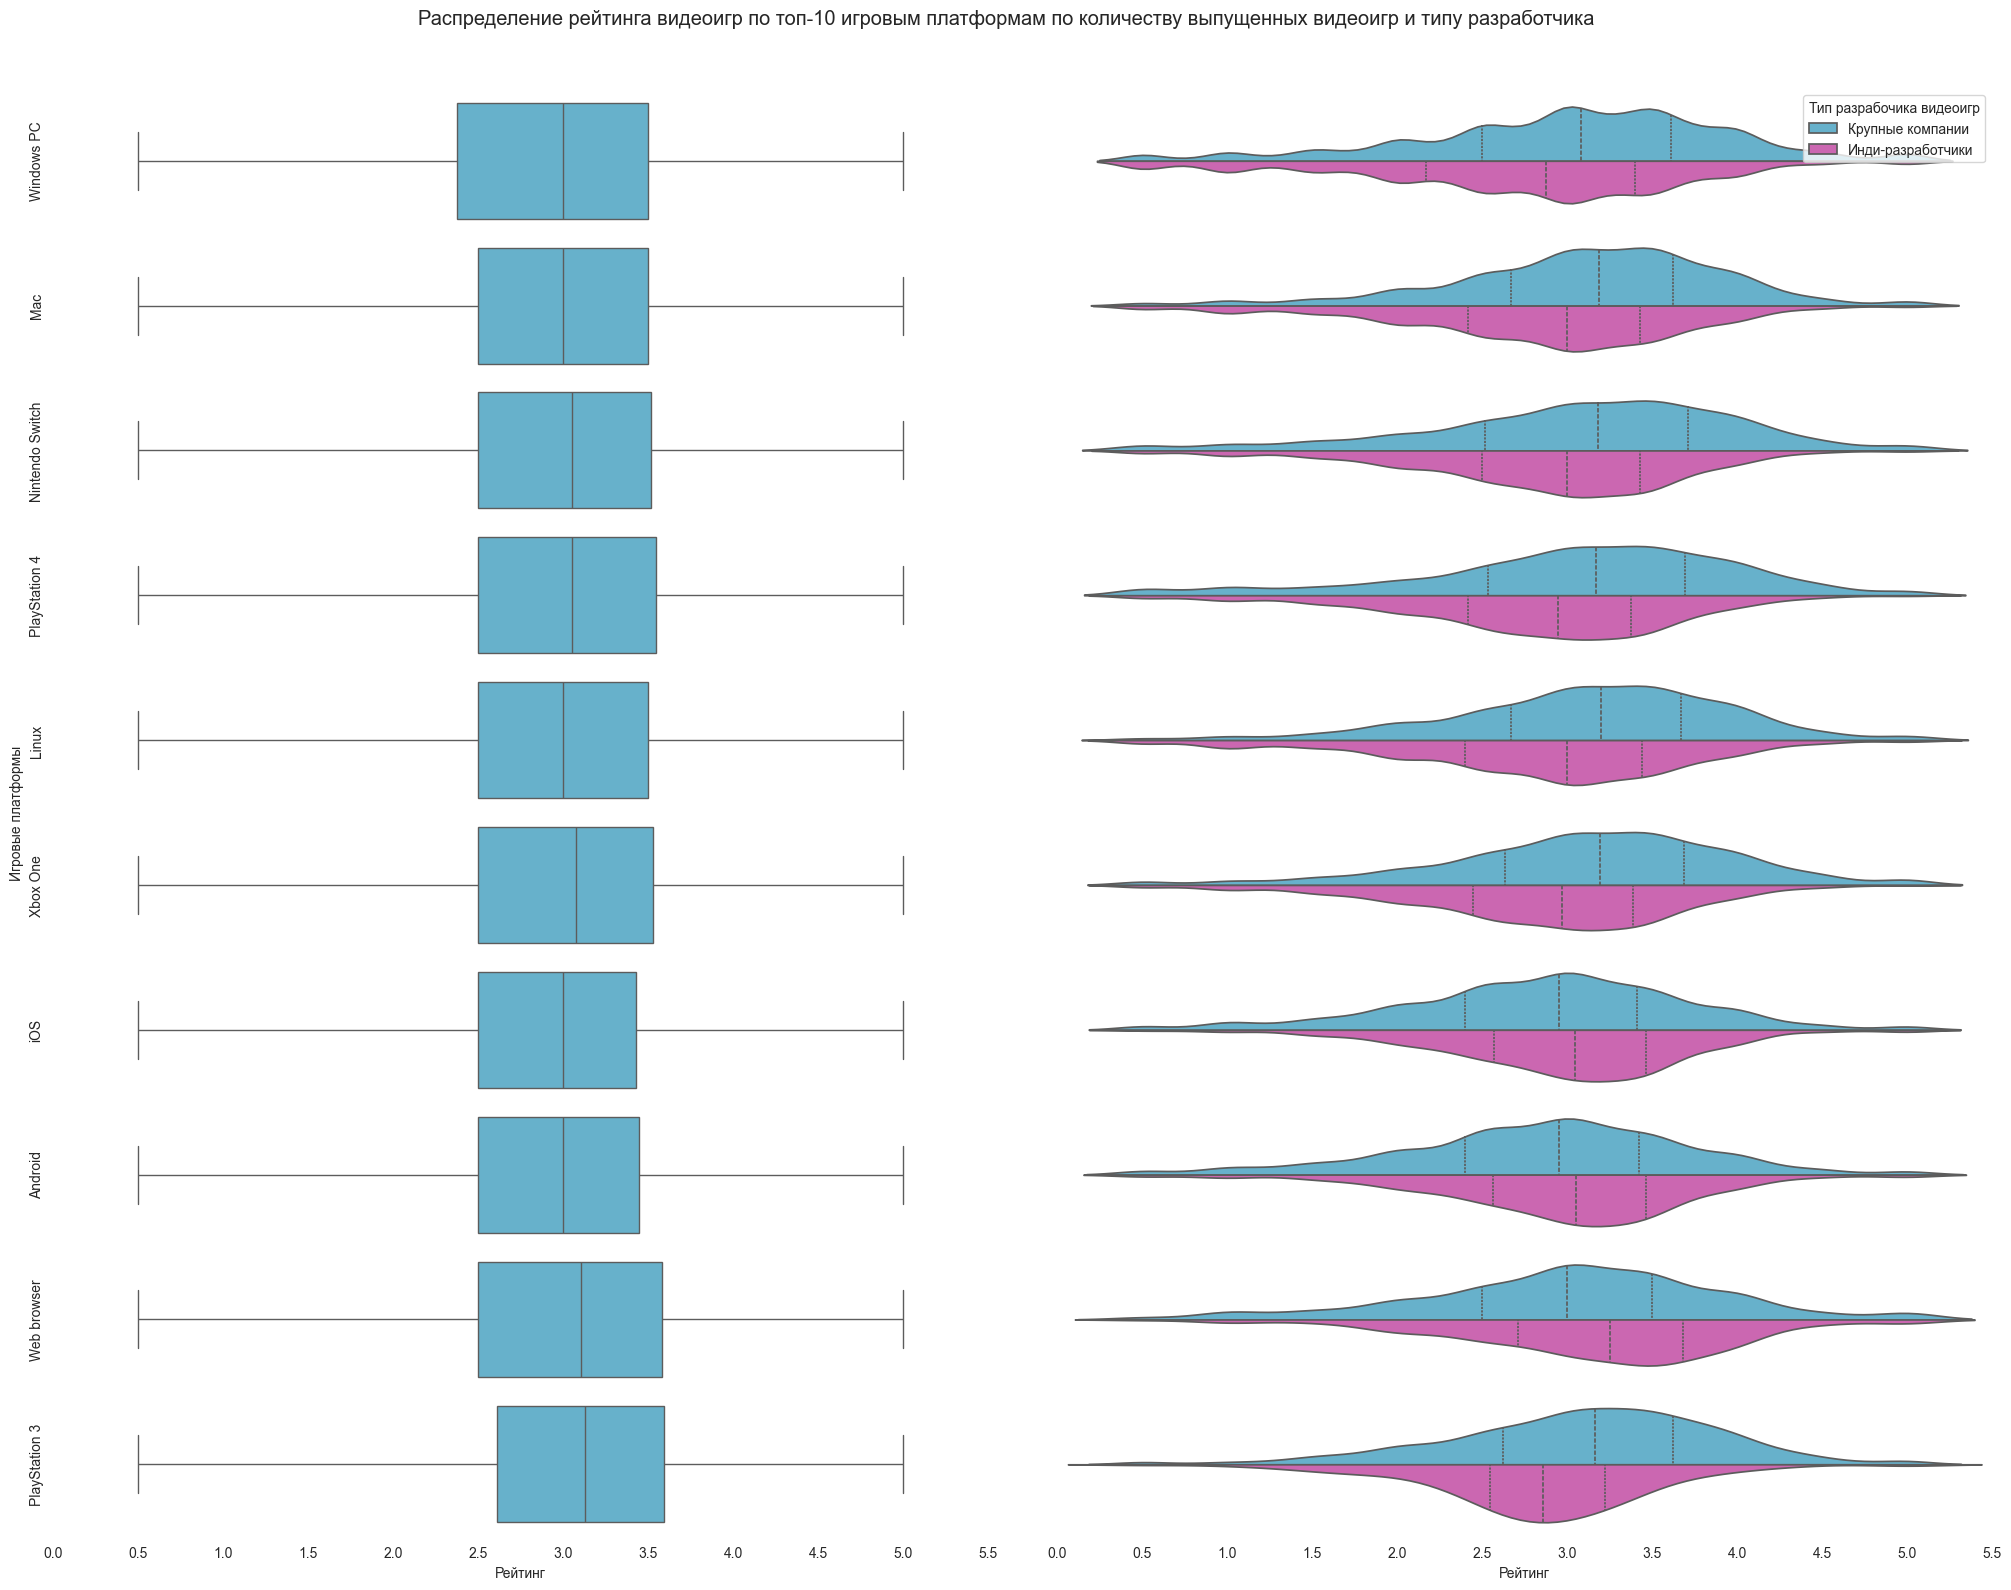

In [63]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 15)
)

figure.suptitle(
    t=('Распределение рейтинга видеоигр '
       'по топ-10 игровым платформам по количеству выпущенных видеоигр '
       'и типу разработчика'), 
    y=1.05, 
    fontsize='x-large'
)

grid = GridSpec(
    figure=figure,
    nrows=1, 
    ncols=2, 
    wspace=0.05
)

figure.add_subplot(grid[0, 0])
figure.add_subplot(grid[0, 1])

data = df.explode(column='platforms')
platforms = (df
          .loc[:, 'platforms']
          .explode()
          .value_counts()
          .iloc[:10])
columns = ['rating', 'platforms', 'indie']
plot_data = (data
             .loc[data['platforms'].isin(platforms.index), columns]
             .reset_index(drop=True)
             .replace({True: 'Инди-разработчики', 
                       False: 'Крупные компании'})
             .sort_values(
                 by='platforms',
                 key=lambda x: platforms.rank()[x], 
                 ascending=False
                 ))

sns.boxplot(
    data=plot_data,
    x='rating',
    y='platforms',
    whis=(0, 100),
    ax=figure.axes[0],
    color=sns.color_palette('hls', 15)[8]
)

sns.violinplot(
    data=plot_data,
    x='rating',
    y='platforms',
    hue='indie',
    hue_order=['Крупные компании', 'Инди-разработчики'],
    split=True,
    inner="quart",
    bw_adjust=1.0,
    ax=figure.axes[1],
    palette=sns.color_palette('hls', 15)[8::5]
)

for i in range(2):
    figure.axes[i].set_xlabel('Рейтинг')
    figure.axes[i].set_ylabel('Игровые платформы' if not i else '')
    figure.axes[i].set_xbound((0.0, 5.5))
    figure.axes[i].set_xticks(np.linspace(0.0, 5.5, 12))
    for s in 'top', 'right', 'bottom', 'left':
        figure.axes[i].spines[s].set_visible(False)

figure.axes[0].set_yticks(
    ticks=np.arange(10), 
    labels=platforms.index.map(str),
    rotation=90,
    verticalalignment='center'
)
figure.axes[1].set_yticklabels([])
figure.axes[1].legend(
    title='Тип разрабочика видеоигр', 
    loc='upper right', 
    alignment='left'
);

**Игровые платформы не оказывают** (было рассмотренно топ-10 игровых платформ по количеству выпущенных видеоигр) существенного влияния на распределение рейтинга видеоигр. Если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то для большенства игровых платформ, видеоигры, выпущенные  **инди-разработчиками**, имеют средний рейтинг ниже, чем видеоигры выпущенные **крупными компаниями**.

Посмотрим, как распределен рейтинг видеоигр по топ-10 игровых жанрам по количеству выпущенных видеоигр и по типу разработчика.

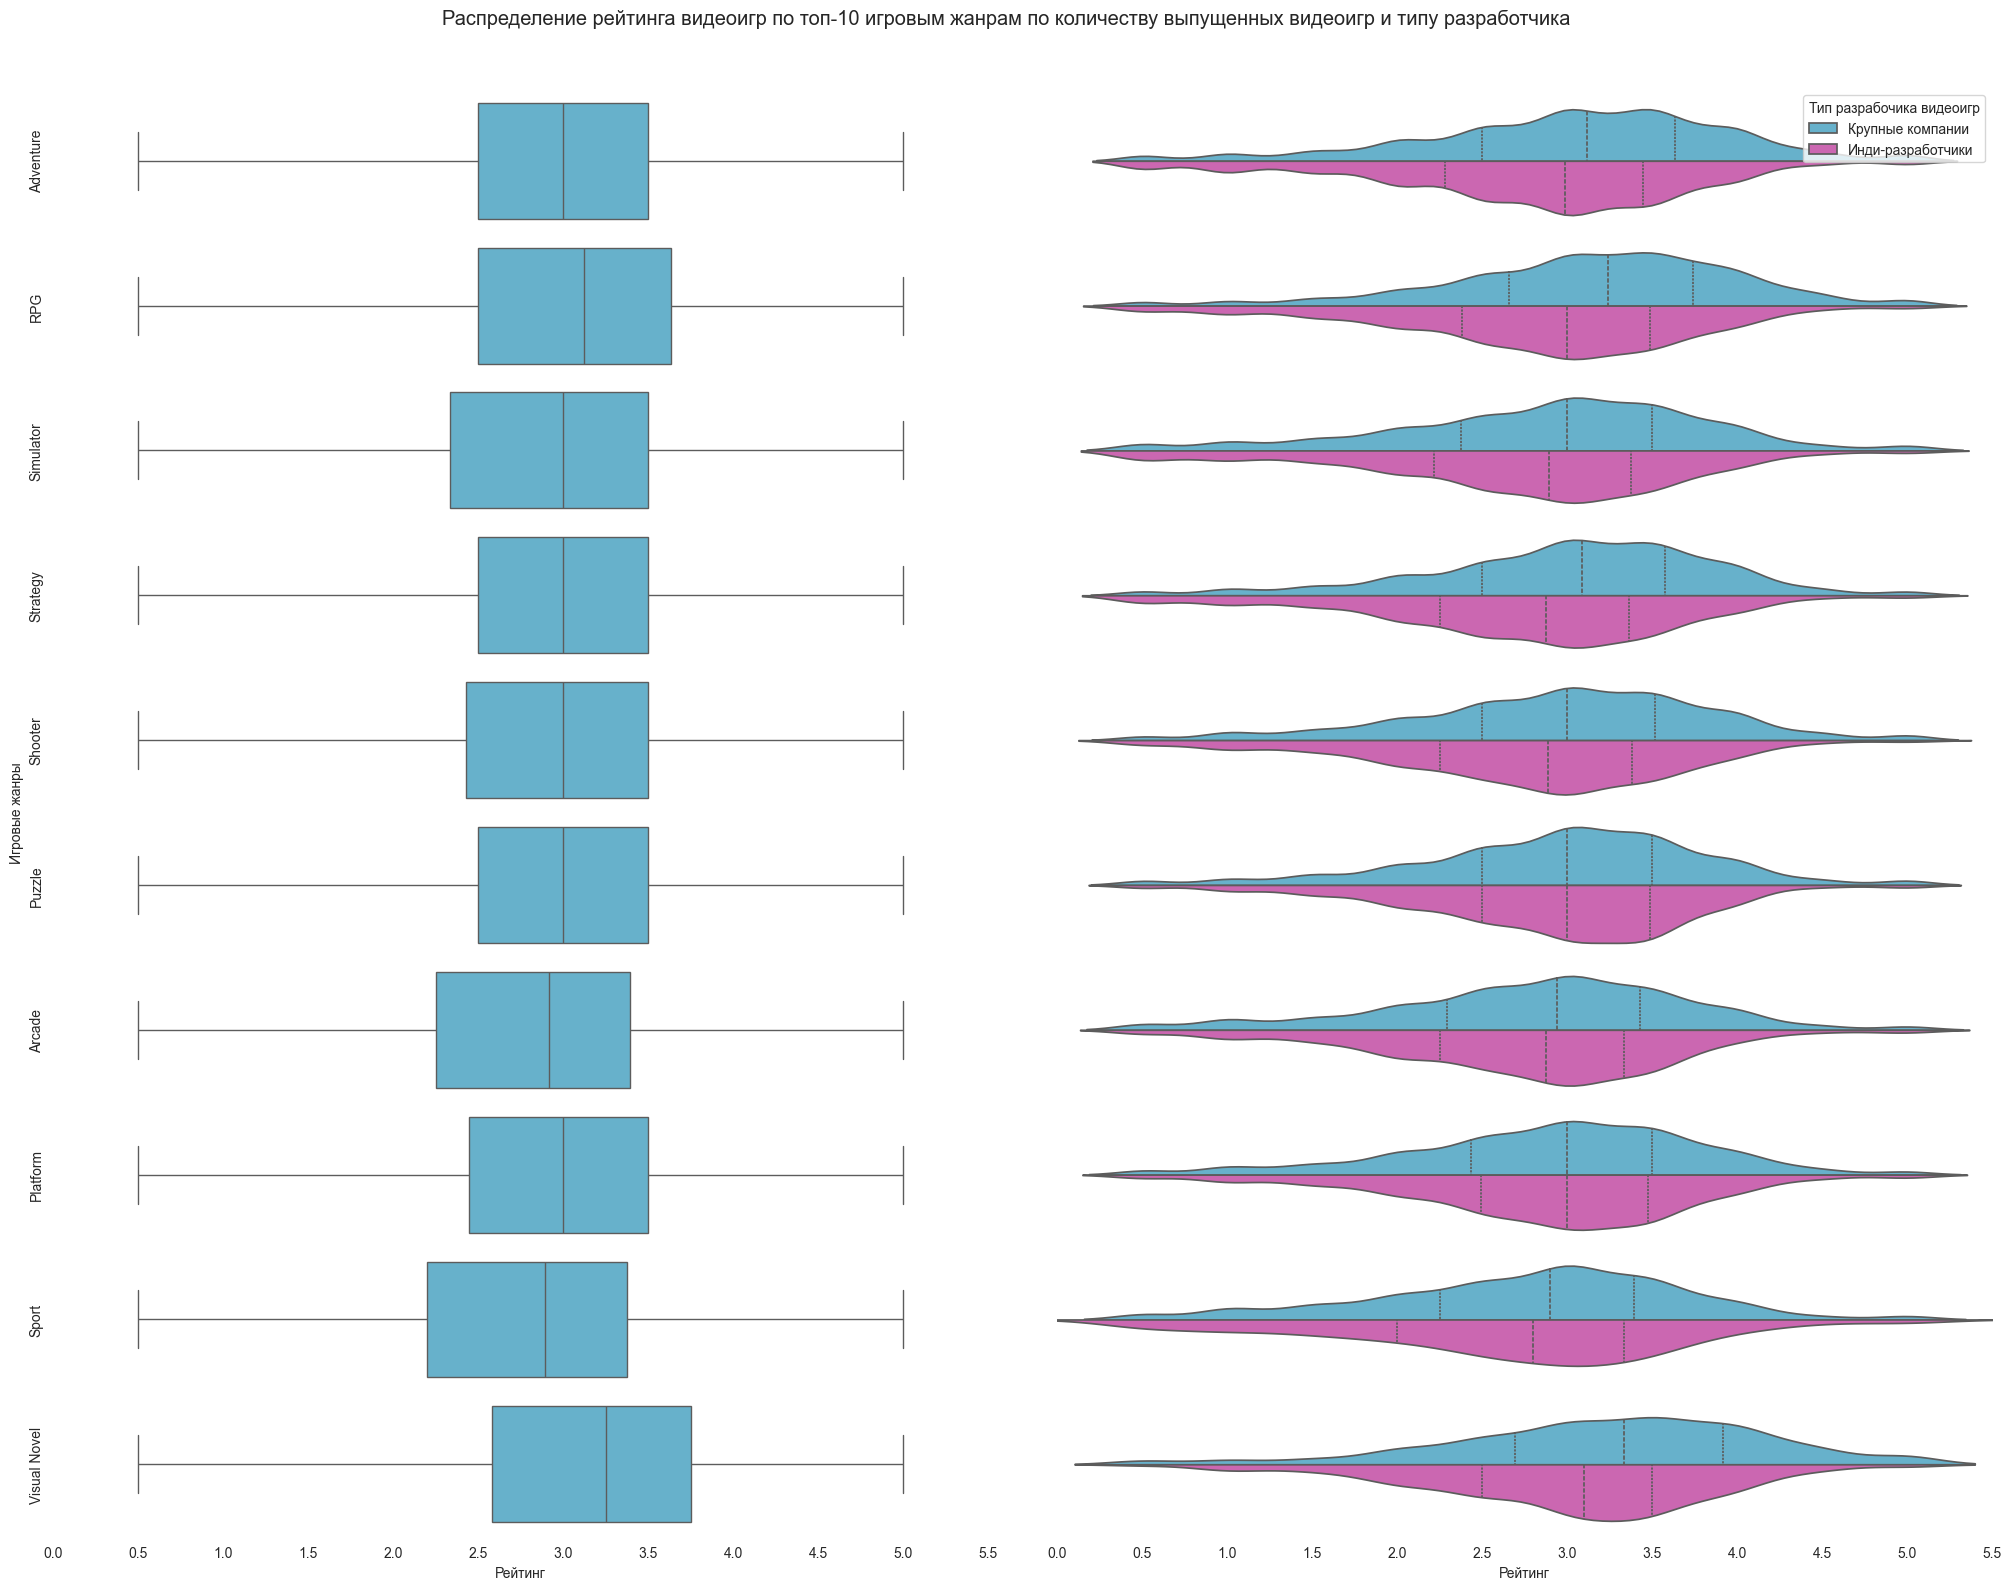

In [64]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 15)
)

figure.suptitle(
    t=('Распределение рейтинга видеоигр '
       'по топ-10 игровым жанрам по количеству выпущенных видеоигр '
       'и типу разработчика'), 
    y=1.05, 
    fontsize='x-large'
)

grid = GridSpec(
    figure=figure,
    nrows=1, 
    ncols=2, 
    wspace=0.05
)

figure.add_subplot(grid[0, 0])
figure.add_subplot(grid[0, 1])

data = df.explode(column='genres')
genres = (df
          .loc[:, 'genres']
          .explode()
          .value_counts()
          .iloc[:10])
columns = ['rating', 'genres', 'indie']
plot_data = (data
             .loc[data['genres'].isin(genres.index), columns]
             .reset_index(drop=True)
             .replace({True: 'Инди-разработчики', 
                       False: 'Крупные компании'})
             .sort_values(
                 by='genres',
                 key=lambda x: genres.rank()[x], 
                 ascending=False
                 ))

sns.boxplot(
    data=plot_data,
    x='rating',
    y='genres',
    whis=(0, 100),
    ax=figure.axes[0],
    color=sns.color_palette('hls', 15)[8]
)

sns.violinplot(
    data=plot_data,
    x='rating',
    y='genres',
    hue='indie',
    hue_order=['Крупные компании', 'Инди-разработчики'],
    split=True,
    inner="quart",
    bw_adjust=1.0,
    ax=figure.axes[1],
    palette=sns.color_palette('hls', 15)[8::5]
)

for i in range(2):
    figure.axes[i].set_xlabel('Рейтинг')
    figure.axes[i].set_ylabel('Игровые жанры' if not i else '')
    figure.axes[i].set_xbound((0.0, 5.5))
    figure.axes[i].set_xticks(np.linspace(0.0, 5.5, 12))
    for s in 'top', 'right', 'bottom', 'left':
        figure.axes[i].spines[s].set_visible(False)

figure.axes[0].set_yticks(
    ticks=np.arange(10), 
    labels=genres.index.map(str),
    rotation=90,
    verticalalignment='center'
)
figure.axes[1].set_yticklabels([])
figure.axes[1].legend(
    title='Тип разрабочика видеоигр', 
    loc='upper right', 
    alignment='left'
);

**Игровые жанры оказывают большее влияние** (было рассмотренно топ-10 игровых жанров по количеству выпущенных видеоигр), на распределение рейтинга видеоигр чем игровые платформы. Если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то для большенства игровых жанров, видеоигры, выпущенные  **инди-разработчиками**, имеют средний рейтинг ниже, чем видеоигры выпущенные **крупными компаниями**.

## Анализ категориальных данных 

Посмотрим на описательную статистику категориальных данных.

In [65]:
(df[['developers', 'platforms', 'genres', 'indie']]
 .explode('developers')
 .explode('platforms')
 .explode('genres')
 .describe())

developers   platforms     genres   indie
count            463163      524880     504599  524882
unique            25815         195         22       2
top     Electronic Arts  Windows PC  Adventure   False
freq               5094      138508     104344  334544

Всего в данных имеется: 
- более **25 тыс.** разработчиков видеоигр;
- более **190** игровых платформ;
- более **22** жанров видеоигр.

Посмотрим на распределение количества выпущенных видеоигр по типу разработчика.

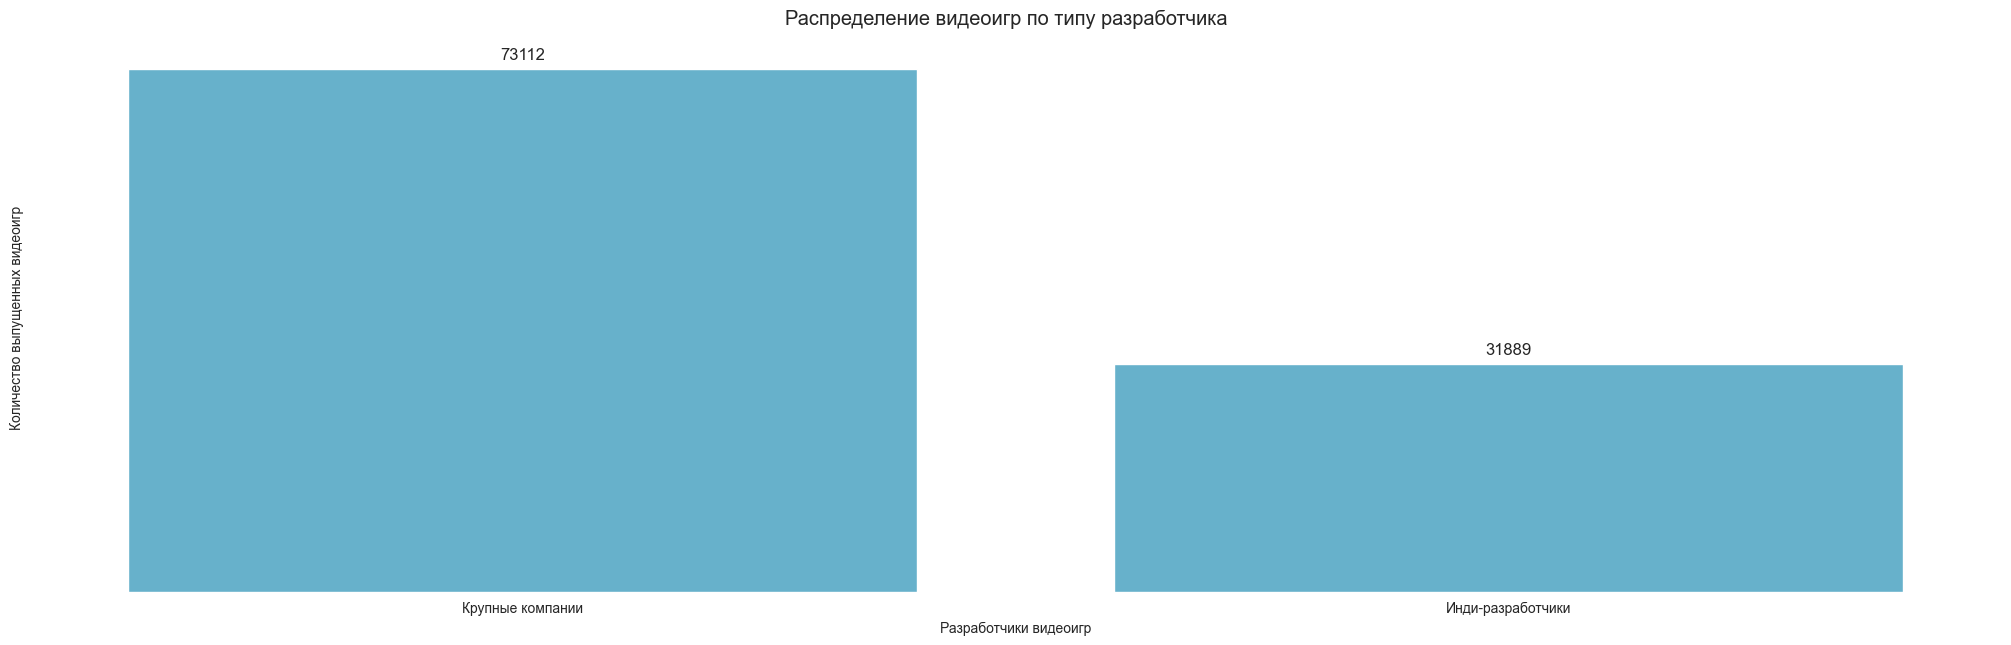

In [66]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 6)
)

figure.suptitle(
    t='Распределение видеоигр по типу разработчика', 
    y=1.05, 
    fontsize='x-large'
)

figure.add_subplot()

plot_data = (df.loc[:, 'indie']
             .value_counts()
             .rename(index={False: 'Крупные компании', 
                            True: 'Инди-разработчики'}))

sns.barplot(
    x=plot_data.index,
    y=plot_data,
    ax=figure.axes[0],
    color=sns.color_palette('hls', 15)[8]
)

figure.axes[0].set_xlabel('Разработчики видеоигр')
figure.axes[0].set_ylabel('Количество выпущенных видеоигр')
figure.axes[0].set_yticks([])
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[0].spines[s].set_visible(False)
figure.axes[0].bar_label(
    container=figure.axes[0].containers[0], 
    fontsize=12, 
    padding=5
);

**Крупных компаний** приблизительно в 2.5 раза больше, чем **инди-разработчиков**.

### Анализ игровых платформ

Посмотрим на топ-15 игровых платформ по количеству выпущенных видеоигр.

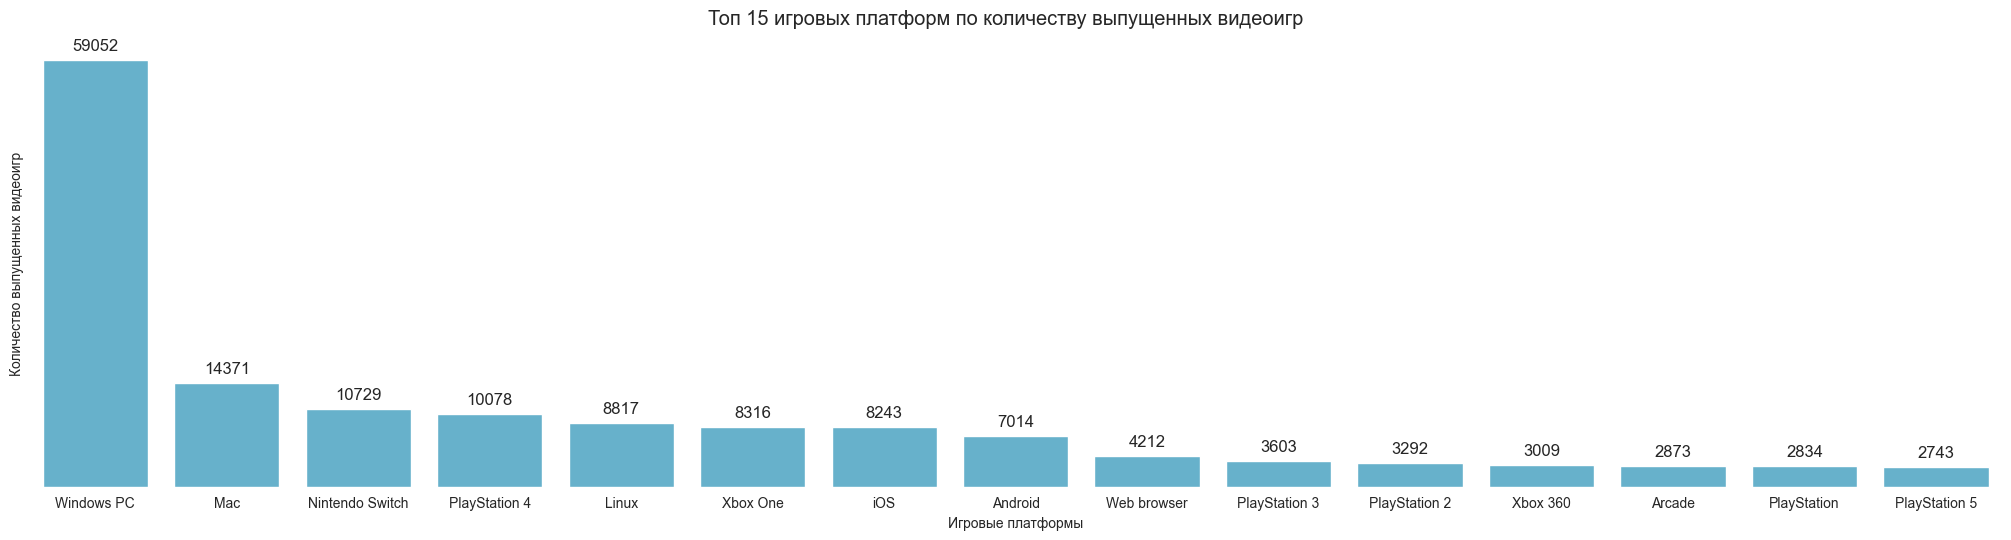

In [67]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 5)
)

figure.suptitle(
    t='Топ 15 игровых платформ по количеству выпущенных видеоигр', 
    y=1.05, 
    fontsize='x-large'
)

figure.add_subplot()

plot_data = (df
             .loc[:, 'platforms']
             .explode()
             .value_counts()
             .iloc[:15])

sns.barplot(
    data=plot_data,
    ax=figure.axes[0],
    color=sns.color_palette('hls', 15)[8]
)

figure.axes[0].set_xlabel('Игровые платформы')
figure.axes[0].set_ylabel('Количество выпущенных видеоигр')
figure.axes[0].set_yticks([])
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[0].spines[s].set_visible(False)
figure.axes[0].bar_label(
    container=figure.axes[0].containers[0], 
    fontsize=12, 
    padding=5
);

**Наибольшее** количество видеоигр выпущено для платформы **Windows PC**, более **50 тыс.** видеоигр. Следующими по количеству выпущенных видеоигр являются **Mac** и **Nintendo Switch**, для них было вупущенно более **14 тыс.** и более **10 тыс.** видеоигр соответственно.

Посмотрим на распределение количества выпущенных видеоигр по типам разработчиков среди топ-15 игровых платформ.

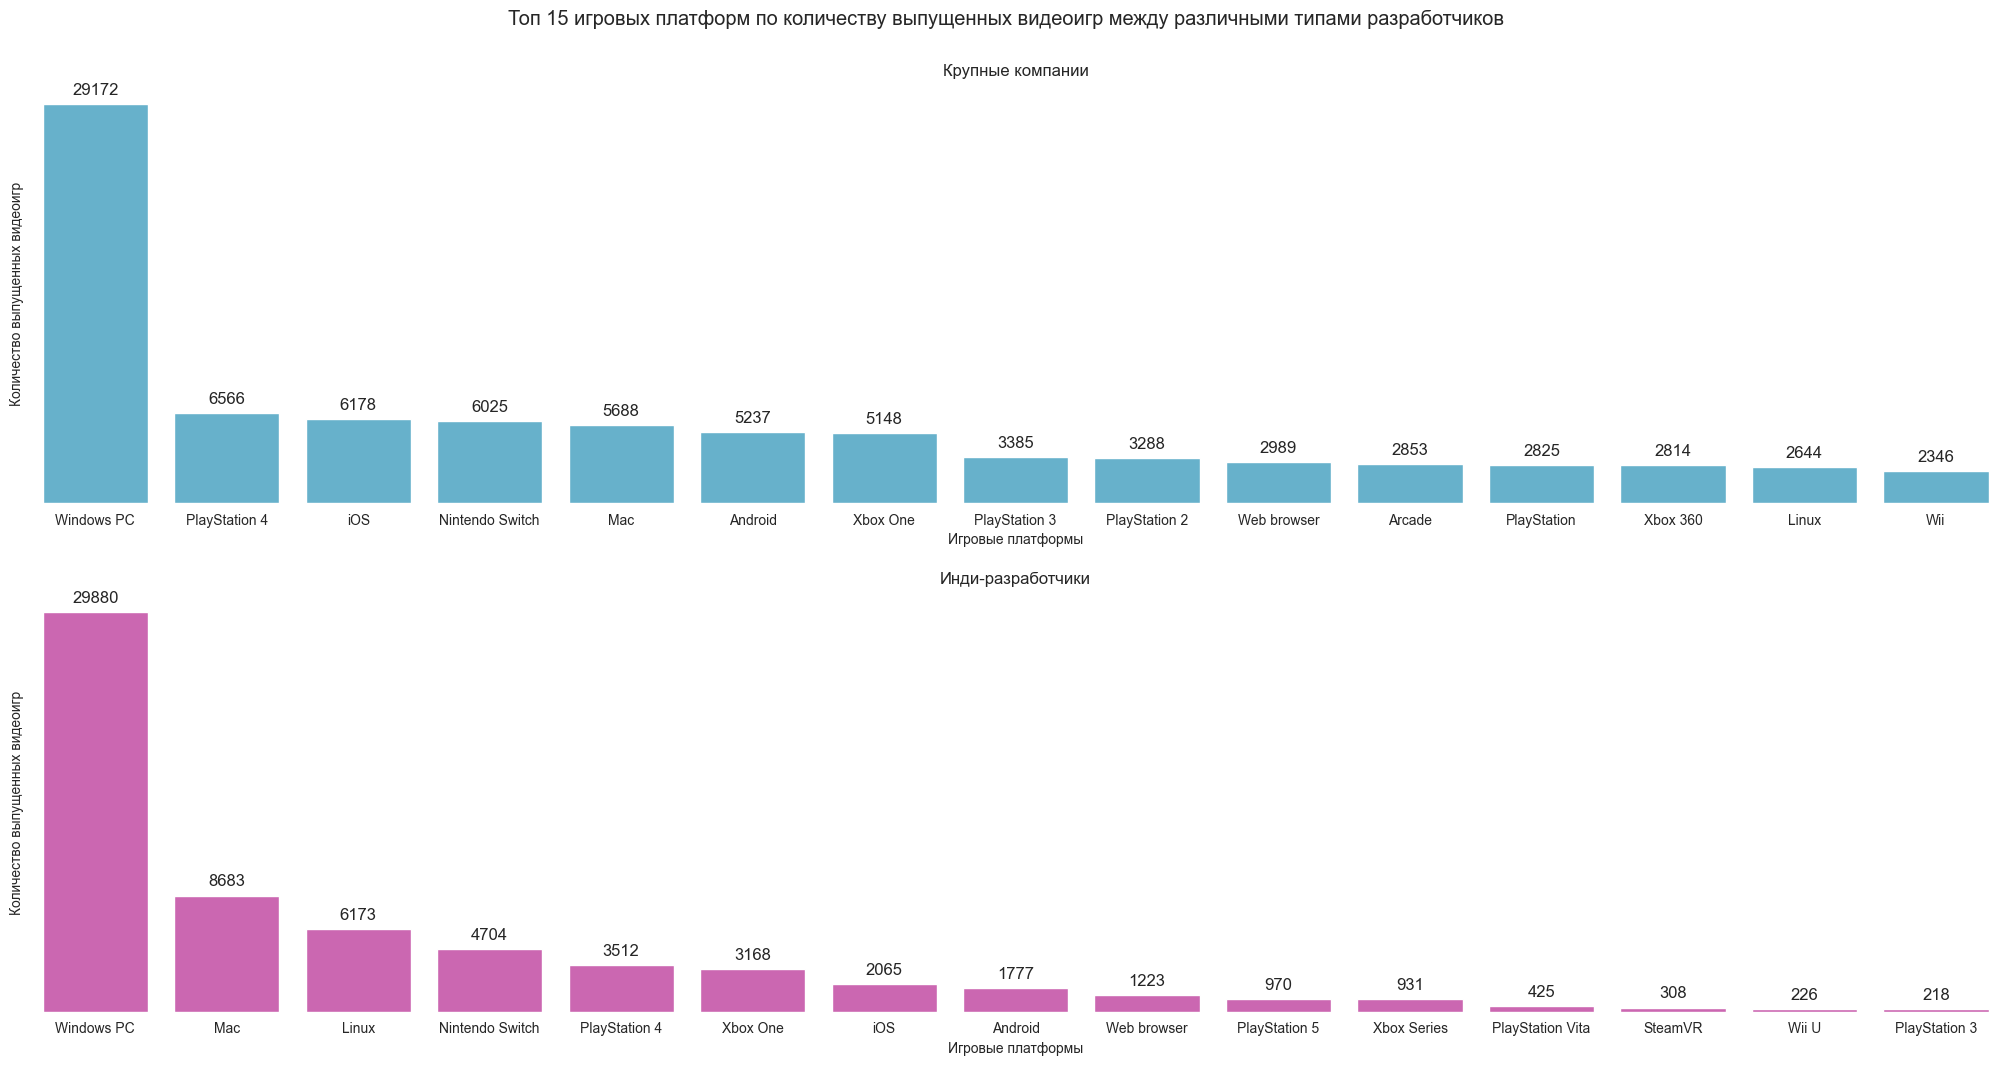

In [68]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 10)
)

figure.suptitle(
    t='Топ 15 игровых платформ по количеству выпущенных видеоигр '
      'между различными типами разработчиков', 
    y=1.05, 
    fontsize='x-large'
)

grid = GridSpec(
    figure=figure,
    nrows=2, 
    ncols=1, 
    hspace=0.05
)

figure.add_subplot(grid[0, 0])
figure.add_subplot(grid[1, 0])

plot_data = ((df
             .loc[~df['indie'], 'platforms']
             .explode()
             .value_counts()
             .iloc[:15]))

sns.barplot(
    data=plot_data,
    ax=figure.axes[0],
    color=sns.color_palette('hls', 15)[8]
)

figure.axes[0].set_title(
    label='Крупные компании',
    y=1,
    fontsize='large'
)
figure.axes[0].set_xlabel('Игровые платформы')
figure.axes[0].set_ylabel('Количество выпущенных видеоигр')
figure.axes[0].set_yticks([])
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[0].spines[s].set_visible(False)
figure.axes[0].bar_label(
    container=figure.axes[0].containers[0], 
    fontsize=12, 
    padding=5
)

plot_data = ((df
             .loc[df['indie'], 'platforms']
             .explode()
             .value_counts()
             .iloc[:15]))

sns.barplot(
    data=plot_data,
    ax=figure.axes[1],
    color=sns.color_palette('hls', 15)[13]
)

figure.axes[1].set_title(
    label='Инди-разработчики',
    y=1,
    fontsize='large'
)
figure.axes[1].set_xlabel('Игровые платформы')
figure.axes[1].set_ylabel('Количество выпущенных видеоигр')
figure.axes[1].set_yticks([])
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[1].spines[s].set_visible(False)
figure.axes[1].bar_label(
    container=figure.axes[1].containers[0], 
    fontsize=12, 
    padding=5
);

Если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то **наибольшее** количество видеоигр выпущено также для платформы **Windows PC**. Для **крупных компаний** следующими по количеству выпущенных видеоигр являются **PlayStation 4** и **IOS**, для них было вупущенно более **6 тыс.** видеоигр. Для **инди-разработчиков** следующими по количеству выпущенных видеоигр являются **Mac** и **Linux**, для них было вупущенно более **8 тыс.** и более **6 тыс.** видеоигр соответственно.

Посмотрим на распределение общего количества игроков среди топ-15 игровых платформ.

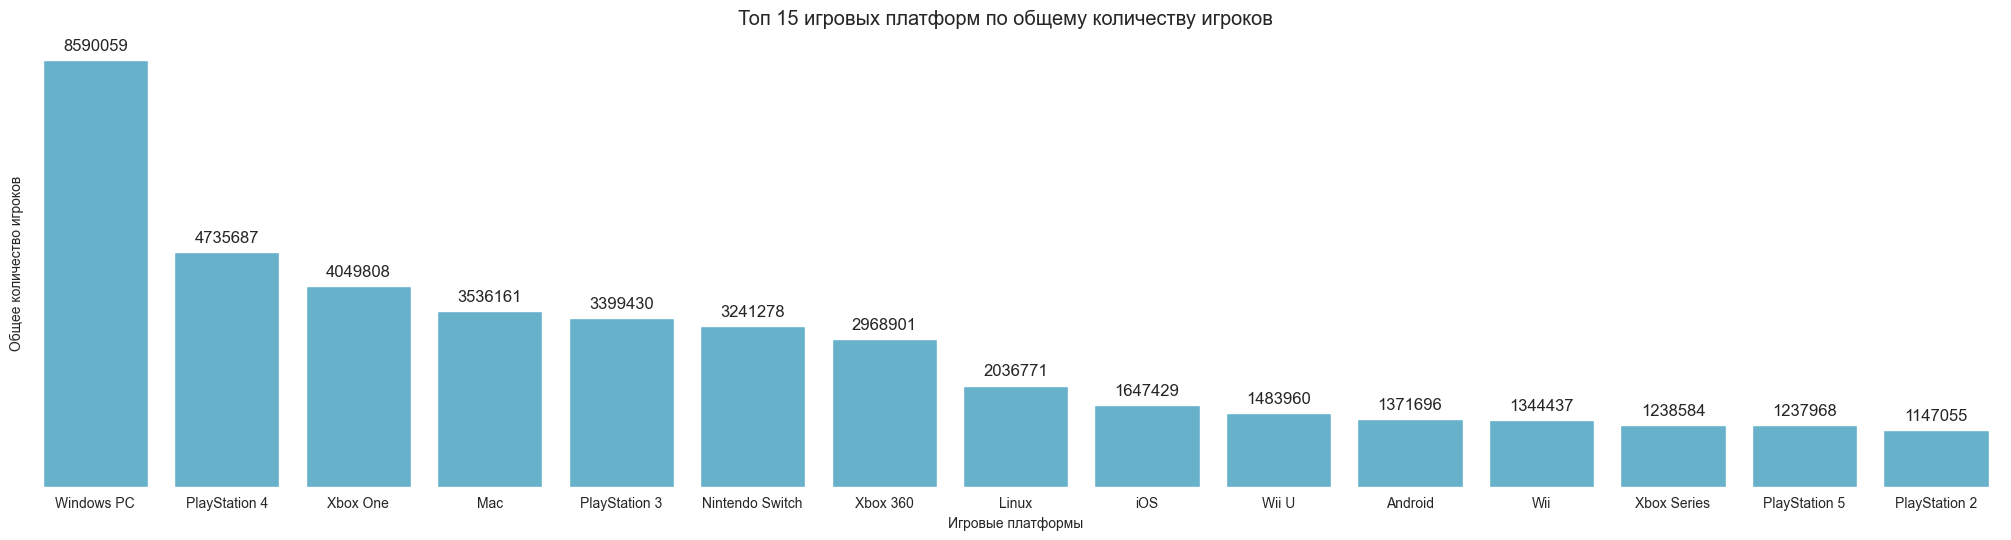

In [69]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 5)
)

figure.suptitle(
    t='Топ 15 игровых платформ по общему количеству игроков', 
    y=1.05, 
    fontsize='x-large'
)

figure.add_subplot()

plot_data = (df[['platforms', 'plays']]
             .explode('platforms')
             .groupby('platforms')
             .sum()
             .sort_values(by='plays', ascending=False)
             .iloc[:15, :]['plays'])

sns.barplot(
    data=plot_data,
    ax=figure.axes[0],
    color=sns.color_palette('hls', 15)[8]
)

figure.axes[0].set_xlabel('Игровые платформы')
figure.axes[0].set_ylabel('Общее количество игроков')
figure.axes[0].set_yticks([])
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[0].spines[s].set_visible(False)
figure.axes[0].bar_label(
    container=figure.axes[0].containers[0],
    fmt='%d',
    fontsize=12, 
    padding=5
);

**Наибольшее** количество игроков играла в игры, которые были выпущены для платформы **Windows PC**, более ***8.5 млн.** игроков. Следующими по количеству игроков являются **PlayStation 4** и **Xbox One**, для данных платформ, количество игроков достигает более **4.7 млн.** и более **4 млн.** соответственно.

Посмотрим на распределение общего количества игроков по типам разработчиков среди топ-15 игровых платформ.

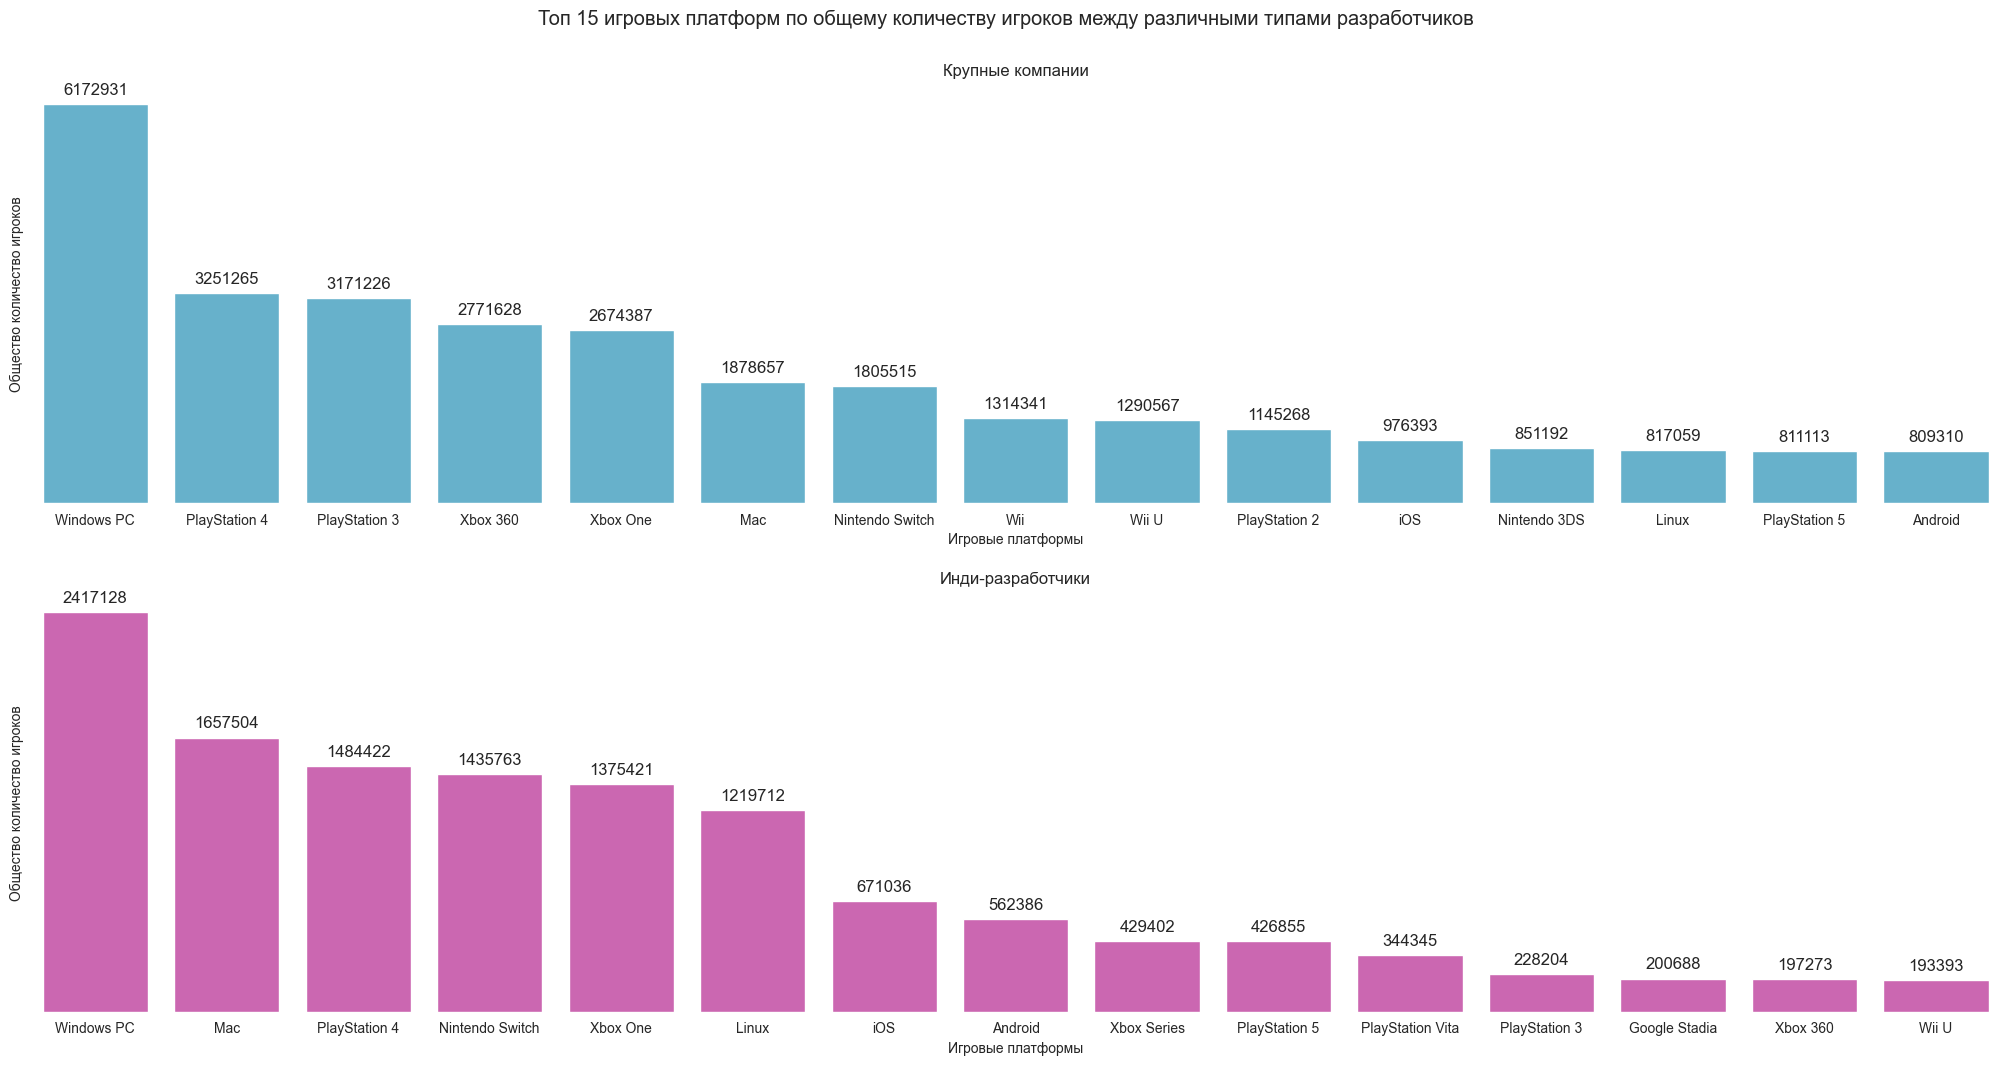

In [70]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 10)
)

figure.suptitle(
    t='Топ 15 игровых платформ по общему количеству игроков '
      'между различными типами разработчиков', 
    y=1.05, 
    fontsize='x-large'
)

grid = GridSpec(
    figure=figure,
    nrows=2, 
    ncols=1, 
    hspace=0.05
)

figure.add_subplot(grid[0, 0])
figure.add_subplot(grid[1, 0])

plot_data = (df
             .loc[~df['indie'], ['platforms', 'plays']]
             .explode('platforms')
             .groupby('platforms')
             .sum()
             .sort_values(by='plays', ascending=False)
             .iloc[:15, :]['plays'])

sns.barplot(
    data=plot_data,
    ax=figure.axes[0],
    color=sns.color_palette('hls', 15)[8]
)

figure.axes[0].set_title(
    label='Крупные компании',
    y=1,
    fontsize='large'
)
figure.axes[0].set_xlabel('Игровые платформы')
figure.axes[0].set_ylabel('Общество количество игроков')
figure.axes[0].set_yticks([])
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[0].spines[s].set_visible(False)
figure.axes[0].bar_label(
    container=figure.axes[0].containers[0],
    fmt='%d',
    fontsize=12, 
    padding=5
)

plot_data = (df
             .loc[df['indie'], ['platforms', 'plays']]
             .explode('platforms')
             .groupby('platforms')
             .sum()
             .sort_values(by='plays', ascending=False)
             .iloc[:15, :]['plays'])

sns.barplot(
    data=plot_data,
    ax=figure.axes[1],
    color=sns.color_palette('hls', 15)[13]
)

figure.axes[1].set_title(
    label='Инди-разработчики',
    y=1,
    fontsize='large'
)
figure.axes[1].set_xlabel('Игровые платформы')
figure.axes[1].set_ylabel('Общество количество игроков')
figure.axes[1].set_yticks([])
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[1].spines[s].set_visible(False)
figure.axes[1].bar_label(
    container=figure.axes[1].containers[0],
    fmt='%d',
    fontsize=12, 
    padding=5
);

Если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то **наибольшее** количество игроков играла в игры, которые были выпущены для платформы **Windows PC**. Для **крупных компаний** следующими по количеству игроков являются игры, которые были выпущены для платформ **PlayStation 4** и **PlayStation 3**, для данных платформ, количество игроков достигает более **3.2 млн**. и более **3.1 млн.** соответственно. Для **инди-разработчиков** следующими по количеству игроков являются игры, которые были выпущены для платформ **Mac** и **PlayStation 4**, для данных платформ, количество игроков достигает более **1.6 млн**. и более **1.4 млн.** соответственно.

### Анализ игровых жанров

Посмотрим на топ-15 игровых жанров по количеству выпущенных видеоигр.

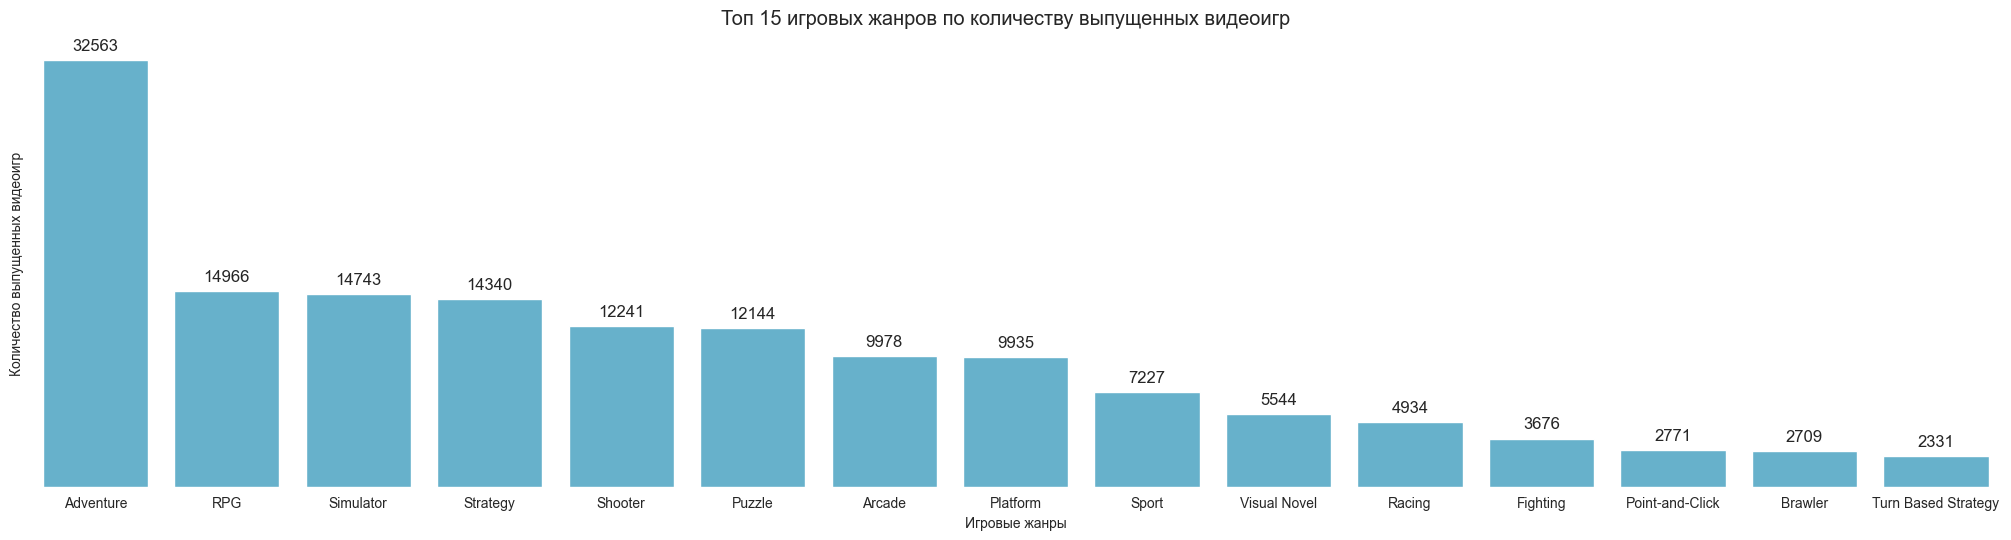

In [71]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 5)
)

figure.suptitle(
    t='Топ 15 игровых жанров по количеству выпущенных видеоигр', 
    y=1.05, 
    fontsize='x-large'
)

figure.add_subplot()

plot_data = (df
             .loc[:, 'genres']
             .explode()
             .value_counts()
             .iloc[:15])

sns.barplot(
    data=plot_data,
    ax=figure.axes[0],
    color=sns.color_palette('hls', 15)[8]
)

figure.axes[0].set_xlabel('Игровые жанры')
figure.axes[0].set_ylabel('Количество выпущенных видеоигр')
figure.axes[0].set_yticks([])
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[0].spines[s].set_visible(False)
figure.axes[0].bar_label(
    container=figure.axes[0].containers[0], 
    fontsize=12, 
    padding=5
);

**Наибольшее** количество видеоигр выпущено в жанре **Adventure**, более **32 тыс.** видеоигр. Следующими по количеству выпущенных видеоигр являются жанры **RPG** и **Simulator**, в данных жанрах было вупущенно более **14 тыс.** видеоигр.

Посмотрим на распределение количества выпущенных видеоигр по типам разработчиков среди топ-15 игровых жанров.

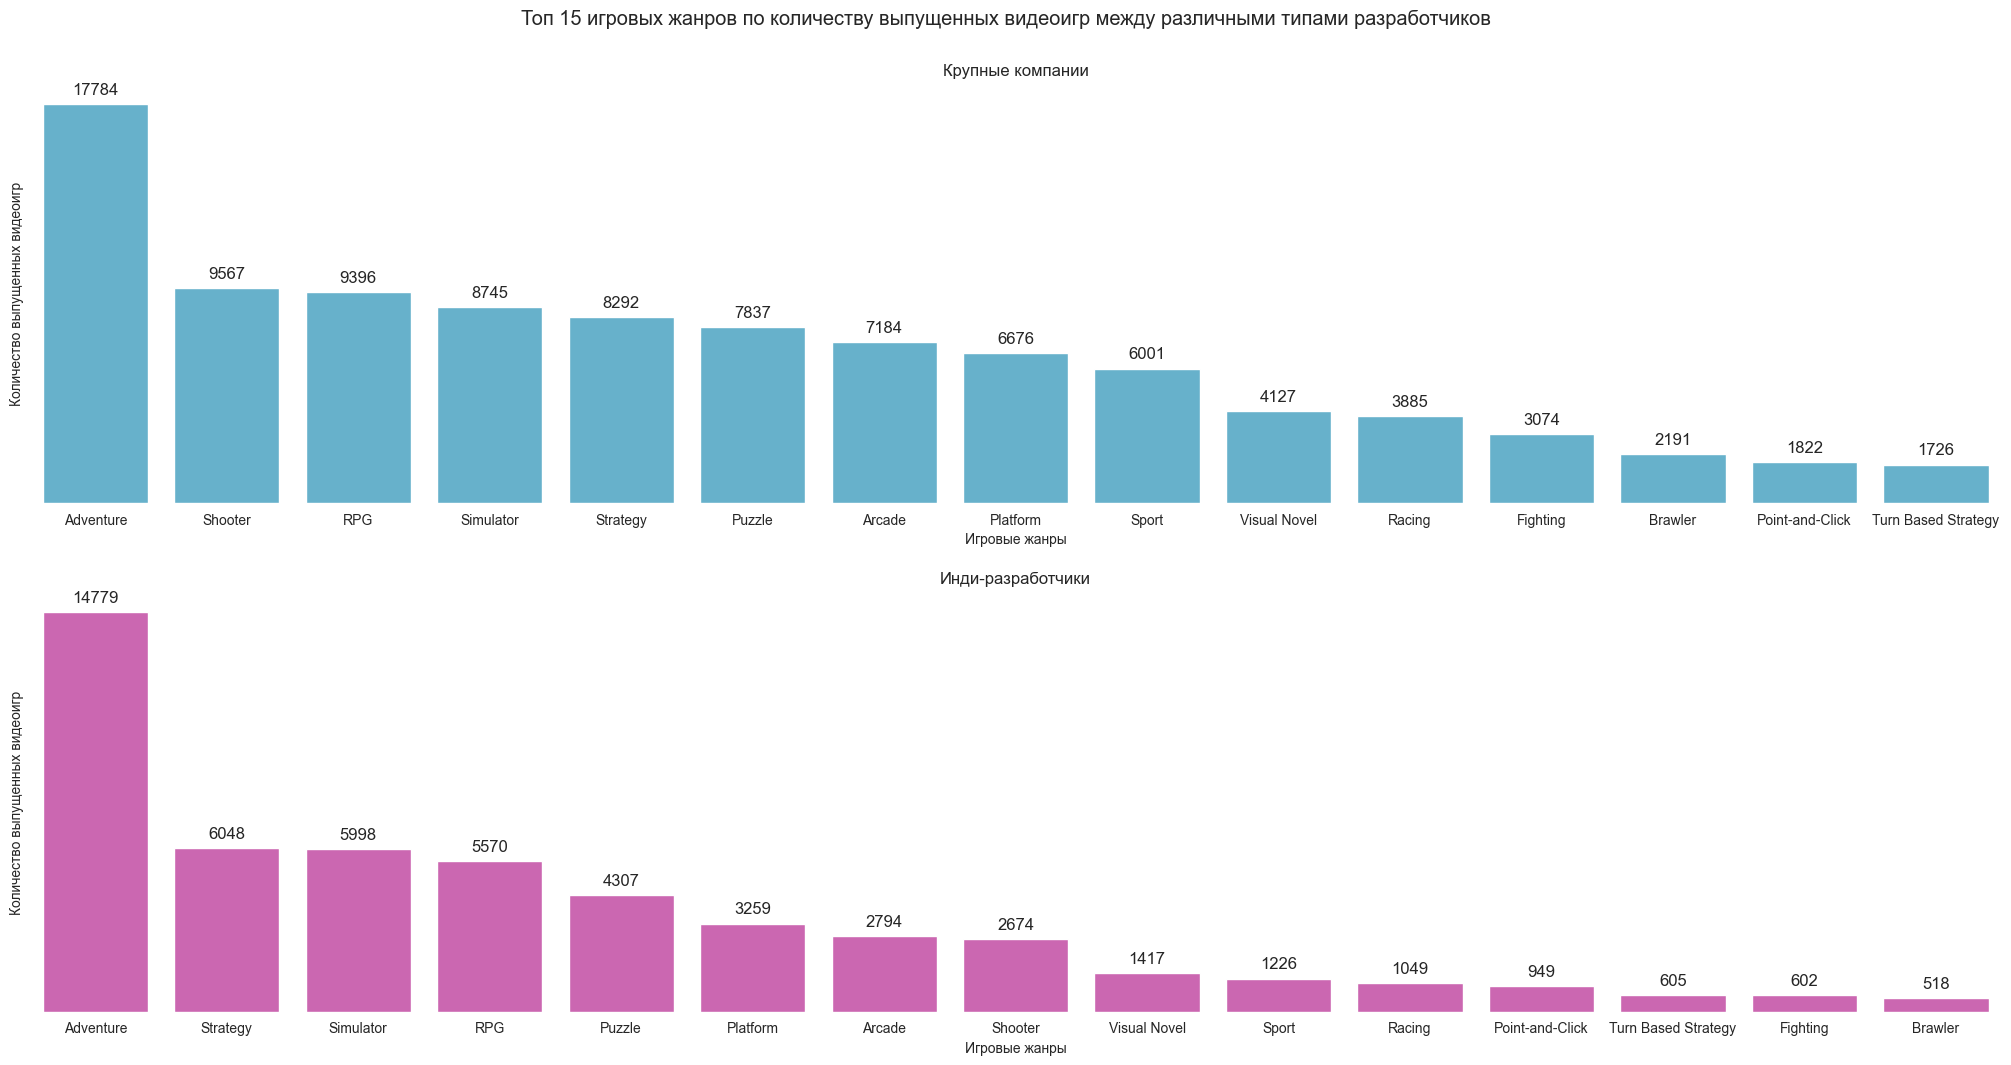

In [72]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 10)
)

figure.suptitle(
    t='Топ 15 игровых жанров по количеству выпущенных видеоигр '
      'между различными типами разработчиков', 
    y=1.05, 
    fontsize='x-large'
)

grid = GridSpec(
    figure=figure,
    nrows=2, 
    ncols=1, 
    hspace=0.05
)

figure.add_subplot(grid[0, 0])
figure.add_subplot(grid[1, 0])

plot_data = ((df
             .loc[~df['indie'], 'genres']
             .explode()
             .value_counts()
             .iloc[:15]))

sns.barplot(
    data=plot_data,
    ax=figure.axes[0],
    color=sns.color_palette('hls', 15)[8]
)

figure.axes[0].set_title(
    label='Крупные компании',
    y=1,
    fontsize='large'
)
figure.axes[0].set_xlabel('Игровые жанры')
figure.axes[0].set_ylabel('Количество выпущенных видеоигр')
figure.axes[0].set_yticks([])
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[0].spines[s].set_visible(False)
figure.axes[0].bar_label(
    container=figure.axes[0].containers[0], 
    fontsize=12, 
    padding=5
)

plot_data = ((df
             .loc[df['indie'], 'genres']
             .explode()
             .value_counts()
             .iloc[:15]))

sns.barplot(
    data=plot_data,
    ax=figure.axes[1],
    color=sns.color_palette('hls', 15)[13]
)

figure.axes[1].set_title(
    label='Инди-разработчики',
    y=1,
    fontsize='large'
)
figure.axes[1].set_xlabel('Игровые жанры')
figure.axes[1].set_ylabel('Количество выпущенных видеоигр')
figure.axes[1].set_yticks([])
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[1].spines[s].set_visible(False)
figure.axes[1].bar_label(
    container=figure.axes[1].containers[0], 
    fontsize=12, 
    padding=5
);

Если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то **наибольшее** количество видеоигр выпущено также в жанре **Adventure**. Для **крупных компаний** следующими по количеству выпущенных видеоигр являются жанры **Shooter** и **RPG**, в данных жанрах было вупущенно более **9 тыс.** видеоигр. Для **инди-разработчиков** следующими по количеству выпущенных видеоигр являются жанры **Strategy** и **Simulator**, в данных жанрах было вупущенно более **6 тыс.** видеоигр.

Посмотрим на распределение общего количества игроков среди топ-15 игровых жанров.

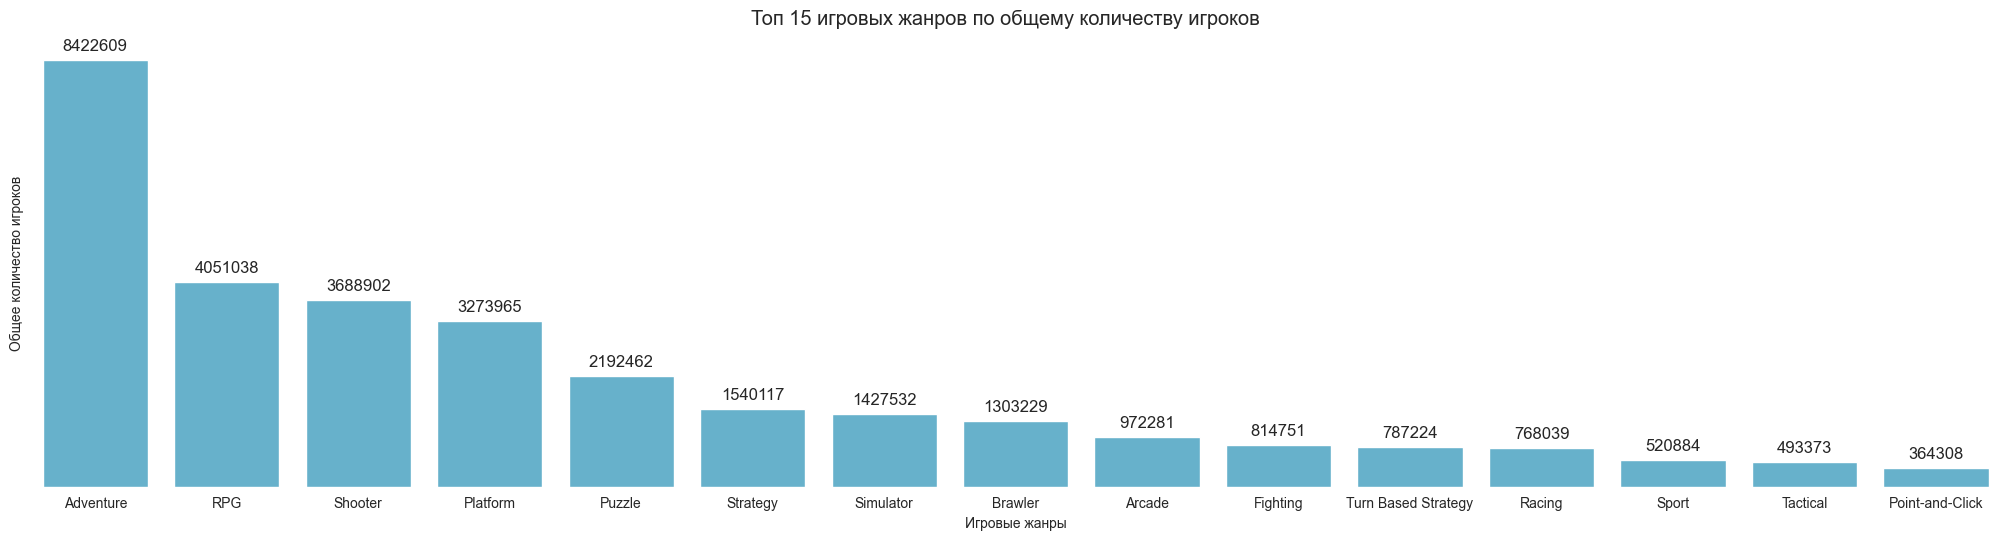

In [73]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 5)
)

figure.suptitle(
    t='Топ 15 игровых жанров по общему количеству игроков', 
    y=1.05, 
    fontsize='x-large'
)

figure.add_subplot()

plot_data = (df[['genres', 'plays']]
             .explode('genres')
             .groupby('genres')
             .sum()
             .sort_values(by='plays', ascending=False)
             .iloc[:15, :]['plays'])

sns.barplot(
    data=plot_data,
    ax=figure.axes[0],
    color=sns.color_palette('hls', 15)[8]
)

figure.axes[0].set_xlabel('Игровые жанры')
figure.axes[0].set_ylabel('Общее количество игроков')
figure.axes[0].set_yticks([])
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[0].spines[s].set_visible(False)
figure.axes[0].bar_label(
    container=figure.axes[0].containers[0],
    fmt='%d',
    fontsize=12, 
    padding=5
);

**Наибольшее** количество игроков играла в игры, которые были выпущены в жанре **Adventure**, более **8.4 млн.** игроков. Следующими по количеству игроков являются жанры **RPG** и **Shooter**, для данных жанров, количество игроков достигает более **4 млн.** и более **3.6 млн.** игроков соответственно.

Посмотрим на распределение общего количества игроков по типам разработчиков среди топ-15 игровых жанров.

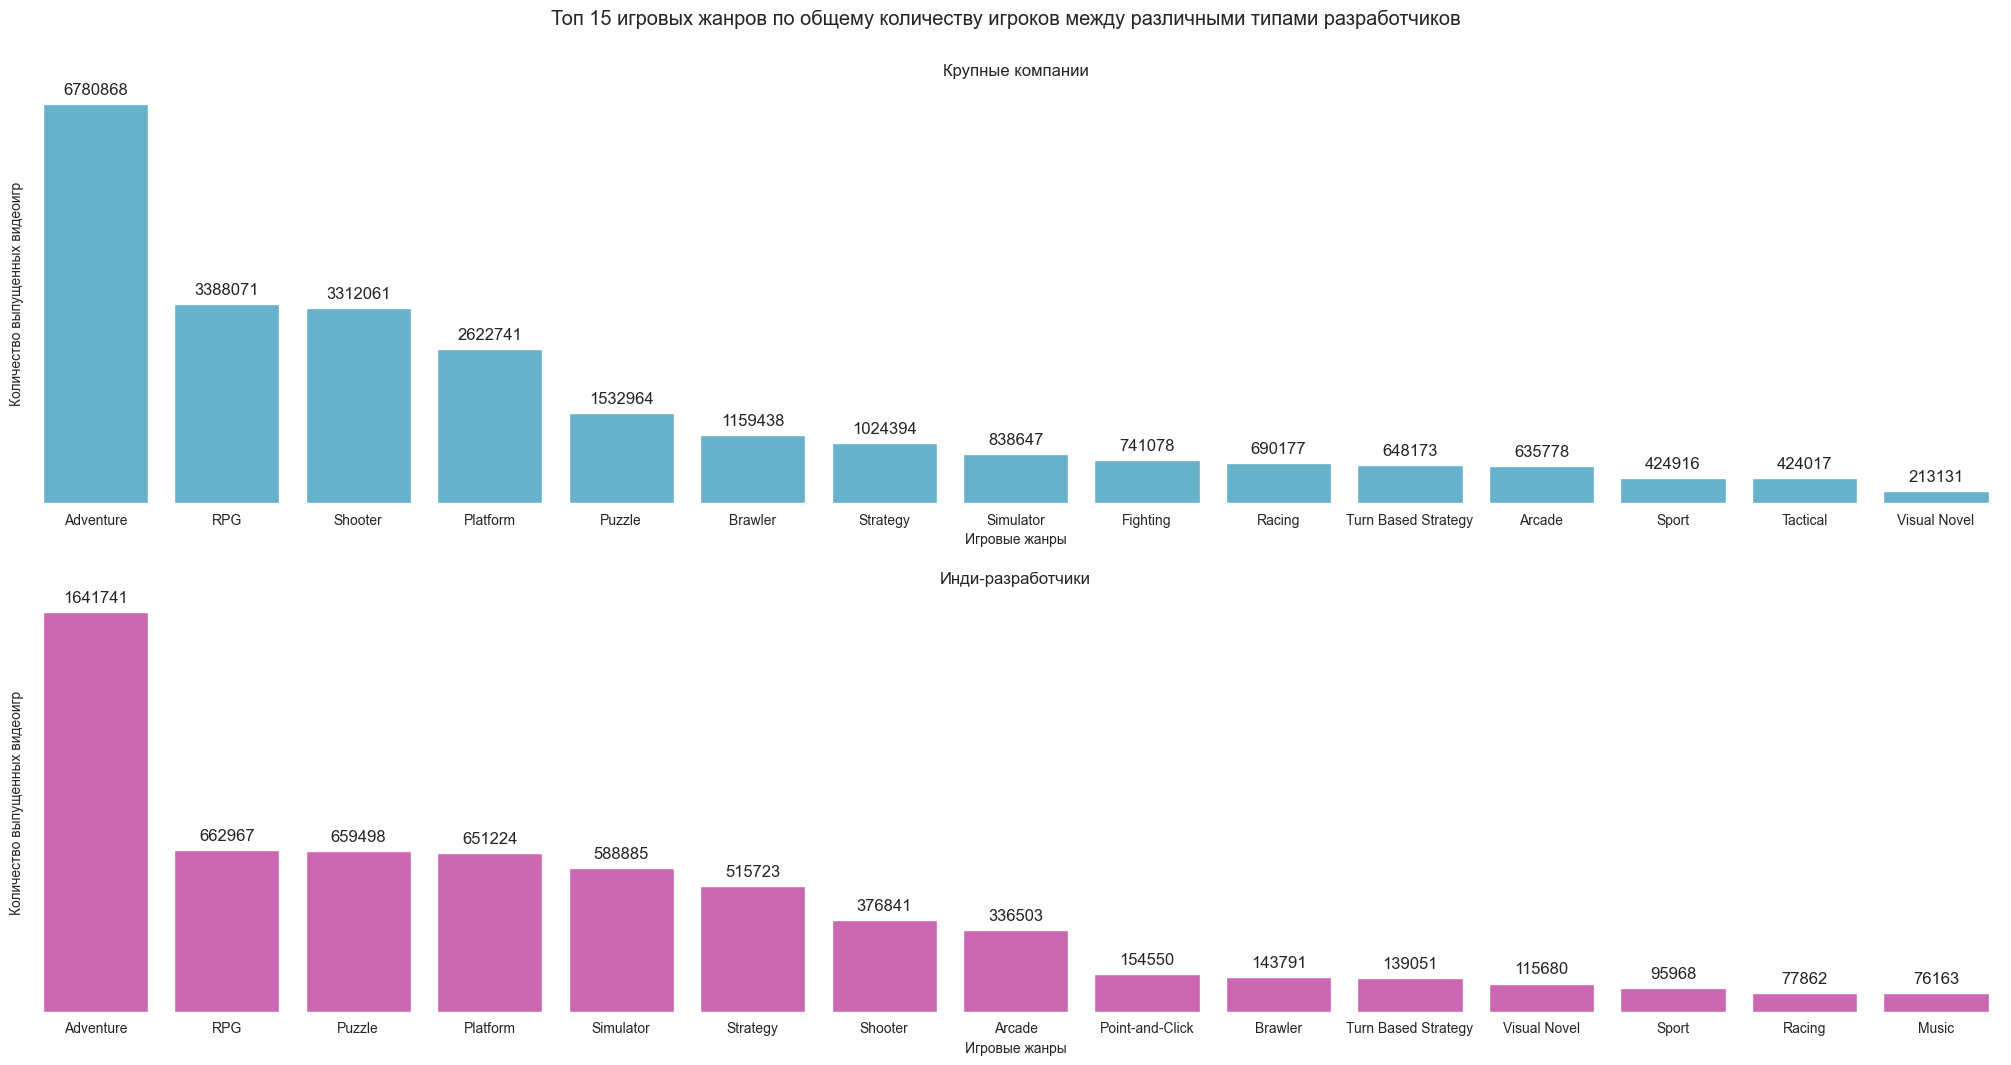

In [74]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 10)
)

figure.suptitle(
    t='Топ 15 игровых жанров по общему количеству игроков '
      'между различными типами разработчиков', 
    y=1.05, 
    fontsize='x-large'
)

grid = GridSpec(
    figure=figure,
    nrows=2, 
    ncols=1, 
    hspace=0.05
)

figure.add_subplot(grid[0, 0])
figure.add_subplot(grid[1, 0])

plot_data = (df
             .loc[~df['indie'], ['genres', 'plays']]
             .explode('genres')
             .groupby('genres')
             .sum()
             .sort_values(by='plays', ascending=False)
             .iloc[:15, :]['plays'])

sns.barplot(
    data=plot_data,
    ax=figure.axes[0],
    color=sns.color_palette('hls', 15)[8]
)

figure.axes[0].set_title(
    label='Крупные компании',
    y=1,
    fontsize='large'
)
figure.axes[0].set_xlabel('Игровые жанры')
figure.axes[0].set_ylabel('Количество выпущенных видеоигр')
figure.axes[0].set_yticks([])
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[0].spines[s].set_visible(False)
figure.axes[0].bar_label(
    container=figure.axes[0].containers[0],
    fmt='%d',
    fontsize=12, 
    padding=5
)

plot_data = (df
             .loc[df['indie'], ['genres', 'plays']]
             .explode('genres')
             .groupby('genres')
             .sum()
             .sort_values(by='plays', ascending=False)
             .iloc[:15, :]['plays'])

sns.barplot(
    data=plot_data,
    ax=figure.axes[1],
    color=sns.color_palette('hls', 15)[13]
)

figure.axes[1].set_title(
    label='Инди-разработчики',
    y=1,
    fontsize='large'
)
figure.axes[1].set_xlabel('Игровые жанры')
figure.axes[1].set_ylabel('Количество выпущенных видеоигр')
figure.axes[1].set_yticks([])
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[1].spines[s].set_visible(False)
figure.axes[1].bar_label(
    container=figure.axes[1].containers[0],
    fmt='%d',
    fontsize=12, 
    padding=5
);

Если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то **наибольшее** количество игроков играла в игры, которые были выпущены в жанре **Adventure**. Для **крупных компаний** следующими по количеству игроков являются игры, которые были выпущены в жанрах **RPG** и **Shooter**, для данных жанров, количество игроков достигает более **3.3 млн**. Для **инди-разработчиков** следующими по количеству игроков являются игры, которые были выпущены в жанрах **RPG** и **Puzzle**, для данных жанров, количество игроков достигает более **650 тыс**.

# Выводы
***

**Выводы по предварительной обработке данных**.
1. Названия полей оставлены **без изменений**.
2. Удалено более **10 тыс.** (**9.90%**) явных дубликатов.
3. Измены типы данных:
    - для поля **date** изменен тип данных на **datetime**;
    - для **числовых полей**, уменьшена точность до **32 бит**;
    - поля **developers**, **platforms**, **genres** и **votes**, приведены к типу **list**.
4. Изменена структура данных:
    - добавлена логическая переменная **indie**;
    - удалено значение **indie** из поля **genres**;
    - рассчитано поле **rating** на основе поля **votes**;
    - удалено поле **votes**;
5. Удалены пустые записи в полях **name**, **date**, **reviews**, **plays**, **playing**, **backlogs** и **wishlists**.
6. **Удалены записи** (неявные дубликаты), дублирующие значения в полях **name** и **date**.

У **95%** записей, в полях которых отсутсвтуют значения, в полях **reviews**, **plays**, **playing**, **backlogs** и **wishlists** содержаться небольшие значения. Это может говорить о малой популярности данных видеоигигр, и возможно, является причиной отсутствия значений в полях **rating**, **description**, **developers**, **platforms** и **genres**.

**Выводы по разведочному анализу данных**:
1. Дата выпуска видеоигр:
   - самая **первая видеоигра** была выпущена в **1947** году. **Резкий подъем** количества выпущенных видеоигр начинается в **2013** году и достигает свого **пика** в **2021** году (приблизительно **8000** видеоигр);
   - если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то самая **первая видеоигра крупной компанией** была выпущена в **1947** году, а **инди-разаботчиком** в **1970**. **Резкого подъема** количества выпущенных видеоигр **крупными компаниями** не наблюдается, а выпуск видеоигр **инди-разработчиками** начал активноый рост в **2013** году. Наибольшее количество видеоигр было выпущено **крупными компаниями** в **2022** году (приблизительно **4000** видеоигр), **инди-разработчиками** в **2021** (приблизительно **4000** видеоигр). С **2016** по **2021** год количество выпущенных видеоигр **инди-разработчиками** превышало количество выпущенных видеоигр **крупными компаниями**;
   - наибольшее количество видеоигр было выпущено в **декабре**, **1** и **31** числа;
   - если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то для **крупных компаний** закономерность остается прежней, наибольшее количество видеоигр было выпущено в **декабре**, **1** и **31** числа. Для **инди-разрабочиков** количество выпущенных видеоигр **распределено равномерно** между месяцами и дням месяца. Вероятнее всего, в **крупных компаниях** дата выпуска видеоигр **планируется заранее**;
   - **средний ретинг** видеоигр распределен по годам выпуска видеоигр **равномерно** и равен приблизительно **3.0**,  за исключением периода с **1947** по **1985**, когда видеоигры выпускались в не таком большом количестве;
   - если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то закономерность остается прежней, за исключением того, что в разные временные периоды, средний рейтинг видеоигр был больше у **крупных компаний** или **инди-разработчиков**;
   - **общее количество игроков**, игравших в видеоигры, **увеличивалось** вместе с годом выхода видеоигр и достигло **пика** в **2017** году (приблизительно **800 тыс.** игроков), после чего, стало **снижаться** (в игры, вышедшие в **2022** году играло приблизительно **400 тыс.** игроков).
   - если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то акивный рост общего количества игроков видеоигр, выпущенных **крупными компаниями** начался в **1985** году, а выпущенных **инди-разработчиками** в **2009**.
2. Анализ числовых данных:
    - более **90%** видеоигр имеют:
        - **рейтинг** (поле **rating**) - менее  **4.0**;
        - **количество отзывов** (поле **reviews**) - менее **10**;
        - **общее количество игроков** (поле **plays**), менее **100**;
        - **количество игроков**, играющих в видеоигру в настоящий момент менее (поле **playing**) **5**;
        - количество игроков, добавивших видеоигру в **backlog** (поле **backlogs**)  или **wishlist** (поле **wishlists**) - менее **50**.
    - наибольшей зависимостью обладают (коэфициент корреляции Пирсона - более 0.9) - **общее количество игроков** и **количество отзывов**, количество игроков, добавивших видеоигру в **backlog** и **wishlists**. **Остальные числовые данные** (за исключением рейтинга видеоигр) имеют коэфициент корреляции Пирсона не менее **0.6**.
    1. Анализ рейтинга видеоигр:
        - распределение рейтинга видеоигр (поле **rating**) очень близко к **нормальному**.
        - зависимость рейтинга видеоигр от других числовых переменных незначительна (коэффициент корреляции Пиросна менее 0.15). Если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то зависимость рейтинга видеоигр от других числовых переменных **не изменится**.
        - **игровые платформы не оказывают** (было рассмотренно топ-10 игровых платформ по количеству выпущенных видеоигр) существенного влияния на распределение рейтинга видеоигр.
        - если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то для большенства игровых платформ, видеоигры, выпущенные  **инди-разработчиками**, имеют средний рейтинг **ниже**, чем видеоигры выпущенные **крупными компаниями**.
        - **игровые жанры оказывают большее влияние** (было рассмотренно топ-10 игровых жанров по количеству выпущенных видеоигр), на распределение рейтинга видеоигр чем игровые платформы.
        - если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то для большенства игровых жанров, видеоигры, выпущенные  **инди-разработчиками**, имеют средний рейтинг ниже, чем видеоигры выпущенные **крупными компаниями**.
3. Анализ категориальных данных:
    - Всего в данных имеется: 
        - более **25 тыс.** разработчиков видеоигр;
        - более **190** игровых платформ;
        - более **22** жанров видеоигр.
    - **крупных компаний** приблизительно в 2.5 раза больше, чем **инди-разработчиков**.
    1. Анализ игровых платформ:
        - **наибольшее** количество видеоигр выпущено для платформы **Windows PC**, более **50 тыс.** видеоигр. Следующими по количеству выпущенных видеоигр являются **Mac** и **Nintendo Switch**, для них было вупущенно более **14 тыс.** и более **10 тыс.** видеоигр соответственно;
        - если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то **наибольшее** количество видеоигр выпущено также для платформы **Windows PC**. Для **крупных компаний** следующими по количеству выпущенных видеоигр являются **PlayStation 4** и **IOS**, для них было вупущенно более **6 тыс.** видеоигр. Для **инди-разработчиков** следующими по количеству выпущенных видеоигр являются **Mac** и **Linux**, для них было вупущенно более **8 тыс.** и более **6 тыс.** видеоигр соответственно;
        - **наибольшее** количество игроков играла в игры, которые были выпущены для платформы **Windows PC**, более ***8.5 млн.** игроков. Следующими по количеству игроков являются **PlayStation 4** и **Xbox One**, для данных платформ, количество игроков достигает более **4.7 млн.** и более **4 млн.** соответственно;
        - если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то **наибольшее** количество игроков играла в игры, которые были выпущены для платформы **Windows PC**. Для **крупных компаний** следующими по количеству игроков являются игры, которые были выпущены для платформ **PlayStation 4** и **PlayStation 3**, для данных платформ, количество игроков достигает более **3.2 млн**. и более **3.1 млн.** соответственно. Для **инди-разработчиков** следующими по количеству игроков являются игры, которые были выпущены для платформ **Mac** и **PlayStation 4**, для данных платформ, количество игроков достигает более **1.6 млн**. и более **1.4 млн.** соответственно.
    2. Игровые жанры:
        - **наибольшее** количество видеоигр выпущено в жанре **Adventure**, более **32 тыс.** видеоигр. Следующими по количеству выпущенных видеоигр являются жанры **RPG** и **Simulator**, в данных жанрах было вупущенно более **14 тыс.** видеоигр;
        - если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то **наибольшее** количество видеоигр выпущено также в жанре **Adventure**. Для **крупных компаний** следующими по количеству выпущенных видеоигр являются жанры **Shooter** и **RPG**, в данных жанрах было вупущенно более **9 тыс.** видеоигр. Для **инди-разработчиков** следующими по количеству выпущенных видеоигр являются жанры **Strategy** и **Simulator**, в данных жанрах было вупущенно более **6 тыс.** видеоигр;
        - **наибольшее** количество игроков играла в игры, которые были выпущены в жанре **Adventure**, более **8.4 млн.** игроков. Следующими по количеству игроков являются жанры **RPG** и **Shooter**, для данных жанров, количество игроков достигает более **4 млн.** и более **3.6 млн.** игроков соответственно;
        - если рассматривать видеоигры выпущенные **крупными компаниями** и **инди-разработчиками** отдельно, то **наибольшее** количество игроков играла в игры, которые были выпущены в жанре **Adventure**. Для **крупных компаний** следующими по количеству игроков являются игры, которые были выпущены в жанрах **RPG** и **Shooter**, для данных жанров, количество игроков достигает более **3.3 млн**. Для **инди-разработчиков** следующими по количеству игроков являются игры, которые были выпущены в жанрах **RPG** и **Puzzle**, для данных жанров, количество игроков достигает более **650 тыс**.